In [2]:
import pandas as pd

In [3]:
import os
import sys
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
print(dir_path)
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import time
import numpy as np
import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
from lynne_pp import *
import pandas as pd
import matplotlib.pyplot as plt


/Users/josh/Documents/Harvard/GLM


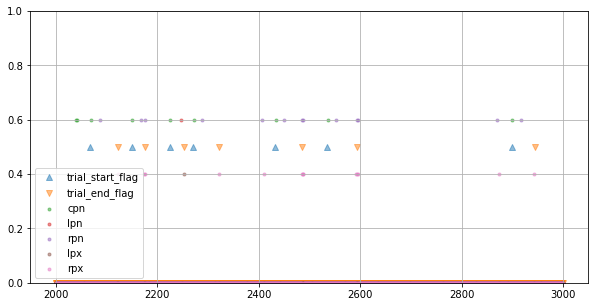

In [4]:
df = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10062021.txt')
df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
df = rename_columns(df)
df = define_trial_starts_ends(df, trial_shift_bounds=1)

lb = 2000
ub = 3000

plt.figure(figsize=(10,5))
care = df.iloc[lb:ub]
for col in ['trial_start_flag', 'trial_end_flag', 'cpn', 'lpn', 'rpn', 'lpx', 'rpx']:
    if col == 'trial_start_flag':
        marker = '^'
        mult = 0.5
    elif col == 'trial_end_flag':
        marker = 'v'
        mult = 0.5
    else:
        marker = '.'
        if col[-1] == 'n':
            mult = 0.6
        else:
            mult = 0.4
    care_filt = care#[care[col] > 0]
    plt.scatter(care_filt.index, care_filt[col]*mult, label=col, alpha=0.5, marker=marker)
plt.ylim(0,1)
plt.grid(True, which='both')
plt.legend()

In [5]:
df_t = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10062021.txt')
df_t

,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
0,0,0,0,0,0,0,1,0,0.1,0.9,0
1,0,0,0,0,0,0,1,0,0.1,0.9,0
2,0,0,0,0,0,0,1,0,0.1,0.9,0
3,0,0,0,0,0,0,1,0,0.1,0.9,0
4,0,0,0,0,0,0,1,0,0.1,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...
260,1,28386,28387,28404,28444,28408,0,1,0.1,0.9,1
261,1,28544,28545,28561,28588,28564,0,1,0.1,0.9,1
262,1,28714,28715,28729,28758,28736,0,1,0.1,0.9,1
263,1,28810,28811,28828,28864,28832,0,1,0.1,0.9,1


In [6]:
# dftmp = df.copy()
# dftmp.loc[df_t['photometrySideOutIndex'].values].drop(0)

In [7]:
# idx = 1354
# dftmp.loc[idx-10:idx+10]

In [8]:
col_lst = [
    'photometryCenterInIndex',
    'photometryCenterOutIndex',
    'photometrySideInIndex',
    'photometrySideOutIndex',
    'photometryFirstLickIndex'
]

In [9]:
import glob

df2 = pd.DataFrame()

data_folder = '/Users/josh/Documents/Harvard/GLM'

# GLM_SIGNALS_WT61_10062021.txt

# for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt'):
#     table_fn = fn.replace('GLM_SIGNALS', 'GLM_TABLE')
#     print(fn, '--', table_fn)

#     df_t = pd.read_csv(table_fn)

#     df = pd.read_csv(fn)    
#     df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
#     # df = rename_columns(df)
#     # df = define_trial_starts_ends(df, trial_shift_bounds=1)
#     # df = preprocess_lynne(df, trial_shift_bounds=1)

#     for col_val in col_lst:
#         new_name = col_val.replace('Index', '')

#         df[new_name] = 0

#         inx = df_t[col_val].values - 1
#         inx = inx[inx >= 0]
#         df.loc[inx, new_name] = 1

#         df[f'{new_name}_r'] = 0
#         df[f'{new_name}_nr'] = 0
#         df.loc[inx, f'{new_name}_r'] = df_t[df_t[col_val] - 1 >= 0]['wasRewarded'].values
#         df.loc[inx, f'{new_name}_nr'] = df_t[df_t[col_val] - 1 >= 0]['wasRewarded'].values

    
#     df['nTrial'] = df['photometryCenterIn'].cumsum()
#     df['nEndsTrial'] = df['photometrySideOut'].cumsum()

#     print(df2.isna().sum().sum())

#     if len(df2) == 0:
#         df2 = df.copy()
#     else:
#         df2 = df2.append(df)

#     # display(df2)
#     # break

In [10]:
# glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt')

In [11]:
import glob
from collections import defaultdict

alignment_index_list = defaultdict(list)

# for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt'):
for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_10152021.txt'):
    table_fn = fn.replace('GLM_SIGNALS', 'GLM_TABLE')
    print(fn, '--', table_fn)

    df_t = pd.read_csv(table_fn)

    df = pd.read_csv(fn)    
    df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
    # df = rename_columns(df)
    # df = define_trial_starts_ends(df, trial_shift_bounds=1)
    # df = preprocess_lynne(df, trial_shift_bounds=1)

    all_inx = (df_t[col_lst].values.reshape(-1) - 1).astype(int)
    assoc_rew = np.tile(df_t['wasRewarded'].values, (len(col_lst))).astype(int)

    assoc_rew = assoc_rew[all_inx >= 0]
    all_inx = all_inx[all_inx >= 0]

    df.loc[all_inx, 'wasRewarded'] = assoc_rew
    # df['wasRewarded'] = df['wasRewarded']#.fillna(0)


    
    for col_val in col_lst:
        new_name = col_val.replace('Index', '')

        df[new_name] = 0

        inx = df_t[col_val].values - 1
        inx = inx[inx >= 0]
        df.loc[inx, new_name] = 1

        df[f'{new_name}_r'] = df[new_name]*df['wasRewarded']
        df[f'{new_name}_nr'] = df[new_name]*(1-df['wasRewarded'])

        alignment_index_list[new_name].append(len(df2) + inx)

        # print(col_val)
        # display(df.loc[inx])    

    df['nTrial'] = df['photometryCenterIn'].cumsum()
    df['nEndTrial'] = df['photometrySideOut'].cumsum()

    # with pd.option_context('max_columns', 1000, 'max_rows', 100):
    #     display(df[~df['wasRewarded'].isna()])
    #     # display(df.iloc[1183:1210])

    # break

    # print(df2.isna().sum().sum())

    if len(df2) == 0:
        df2 = df.reset_index().copy()
    else:
        df2 = df2.append(df.reset_index().copy())

use_list = df[~df['wasRewarded'].isna()]

/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10152021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10152021.txt


In [12]:
df2

,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,...,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
0,0,0.555517,-0.207614,0.720531,-0.801691,0.452445,-1.159573,-0.603638,0.526995,0.452445,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0
1,1,0.821058,-1.212011,0.128694,0.700425,0.479802,0.440579,-1.458203,0.118326,0.479802,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0
2,2,0.895495,-1.309689,0.399287,-0.639261,0.427776,0.009070,-0.136884,0.645182,0.427776,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0
3,3,0.369373,0.235882,-0.657023,1.163822,1.076511,-2.299252,0.615730,1.835773,1.076511,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0
4,4,0.633833,0.080268,-0.220334,2.294948,2.274924,-1.121843,0.704893,0.508825,2.274924,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42623,42623,-0.081565,1.511479,0.292413,1.490038,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,384,384
42624,42624,0.390141,-1.548038,0.749007,-1.176172,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,384,384
42625,42625,1.124807,0.308398,0.711053,-0.067529,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,384,384
42626,42626,1.256430,1.092078,0.528532,0.109901,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,384,384


<AxesSubplot:>

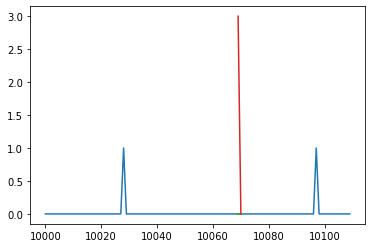

In [13]:
lb = 10000
ub = 10110
df2['photometrySideOut'].iloc[lb:ub].plot()
(df2['photometrySideOut_r']*2).iloc[lb:ub].plot()
(df2['photometrySideOut_nr']*0.5).iloc[lb:ub].plot()
(df2['wasRewarded']*3).iloc[lb:ub].plot()


In [14]:
# df2.iloc[:,-14:]

In [15]:
# # df2.columns

# for col in ['photometryCenterInIndex',
#             'photometryCenterOutIndex',
#             'photometrySideInIndex',
#             'photometrySideOutIndex',
#             'photometryFirstLickIndex',
#             'wasRewarded']:
#     df2[col] = 0
#     inx = df_t[col].values - 1
#     inx = inx[inx >= 0]
#     df2.loc[inx, col] = 1

In [20]:
import seaborn as sns
from tqdm.notebook import tqdm

for channel in ['Ch1', 'Ch2', 'Ch5', 'Ch6']:
    plt.figure(figsize=(10,5))
    # for alignment_col in ['ft_r_spn', 'ft_nr_spn']:
    # for alignment_col in ['photometrySideIn_r', 'photometrySideIn_nr']:
    for alignment_col in ['photometrySideIn_nr']:
        relative_df = pd.DataFrame()
        rel_points = df2[df2[alignment_col] > 0].reset_index()
        # display(rel_points.iloc[:, -15:])
    #     break
    # break

        print('01')
        identifiers = rel_points[['index', 'nTrial', 'nEndTrial']].dropna().values.astype(int)
        print('02')

        lst_extendeds = []
        
        for idx, nTrial, nEndTrial in tqdm(identifiers):
            extended_trial = df2[(df2['nTrial'] == nTrial) | (df2['nEndTrial'] == nEndTrial)].reset_index().copy()
            # print('03', idx)
            extended_trial['index'] -= idx
            # print('04', idx)

            lst_extendeds.append(extended_trial.copy())


            # display(rel_points.iloc[:, -15:])
            with pd.option_context('max_columns', 1000, 'max_rows', 2000):
                display(extended_trial[extended_trial['index'].between(-3, 3)])
    #         break
    #     break
    # break

            # if len(relative_df) == 0:
            #     relative_df = extended_trial.copy()
            # else:
            #     relative_df = pd.concat([relative_df, extended_trial])
            # # print('05', idx)

        relative_df = pd.concat(lst_extendeds)

        
        alignment_name = alignment_col.split('_')[-1]
        sns.lineplot(x='index', y=channel, data=relative_df[relative_df['index'].between(-40, 60)], label=f'{alignment_col} — {channel}')

        print('06')
        # plot_df = relative_df[relative_df['index'].between(-40, 60)].groupby('index')[channel].mean().reset_index()
        # plt.plot(plot_df['index'], plot_df[channel], label=f'{alignment_col} — {channel}')

        print('07')

        plt.title(f'{alignment_name} — {channel}')
        plt.ylim(-1.5,1.5)
        plt.grid()
    plt.legend()
    plt.show()

display(relative_df)


01
02


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
102,1343,-3,-0.692200,0.054817,-1.097199,0.569573,0.495345,-0.690918,0.302907,-1.808285,0.495345,-0.690918,0.302907,-1.808285,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2,1
103,1344,-2,-0.437737,-0.795703,0.014352,0.547163,0.813282,0.136456,-0.673066,-0.353270,0.813282,0.136456,-0.673066,-0.353270,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2,1
104,1345,-1,0.716124,0.275281,1.798110,0.217138,0.529277,-0.818373,0.186515,-1.375048,0.529277,-0.818373,0.186515,-1.375048,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2,1
105,1346,0,1.850648,-0.201337,1.892693,1.668396,0.002216,0.335276,0.519662,0.559641,0.002216,0.335276,0.519662,0.559641,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,2,1
106,1347,1,1.700860,0.165796,2.117494,-0.422582,0.053019,1.473026,1.535234,1.160489,0.053019,1.473026,1.535234,1.160489,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2,1
107,1348,2,1.868452,-0.534294,0.974844,-0.186091,-0.096835,0.157023,1.988605,-1.379861,-0.096835,0.157023,1.988605,-1.379861,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2,1
108,1349,3,1.413715,-0.518668,1.006640,-0.135862,0.160138,0.978834,0.575372,-0.272509,0.160138,0.978834,0.575372,-0.272509,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2,1


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
130,1521,-3,0.194398,0.787641,1.084892,-0.593239,0.630586,0.671685,0.555355,0.768780,0.630586,0.671685,0.555355,0.768780,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,3,2
131,1522,-2,1.064417,0.840901,1.095220,1.190211,-0.712105,0.297236,-0.360979,0.629081,-0.712105,0.297236,-0.360979,0.629081,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,3,2
132,1523,-1,2.324153,-1.056305,1.184760,-0.015983,-0.665546,0.022078,-0.883306,0.327301,-0.665546,0.022078,-0.883306,0.327301,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,3,2
133,1524,0,2.565413,-1.559312,1.777184,0.422764,-0.814681,2.364577,-1.080043,0.360160,-0.814681,2.364577,-1.080043,0.360160,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,3,2
134,1525,1,2.520300,-0.179095,2.583708,-0.443432,-1.008957,1.578966,0.089751,-0.060378,-1.008957,1.578966,0.089751,-0.060378,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,3,2
135,1526,2,3.372795,0.793549,3.218209,-0.879115,-0.314598,1.240939,1.610562,0.400059,-0.314598,1.240939,1.610562,0.400059,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,3,2
136,1527,3,2.157194,1.033404,2.152973,0.319076,0.064006,-0.671913,0.629645,0.796926,0.064006,-0.671913,0.629645,0.796926,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,3,2


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
59,1622,-3,-1.460930,-0.125896,-0.325299,-0.351984,1.673280,-0.547682,-1.044765,0.126368,1.673280,-0.547682,-1.044765,0.126368,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,4,3
60,1623,-2,-0.178887,0.373209,1.227454,2.525910,0.614168,-1.620975,-0.270516,0.374527,0.614168,-1.620975,-0.270516,0.374527,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,4,3
61,1624,-1,1.909562,-0.075869,2.071463,-0.630442,0.264472,-1.505503,-0.196011,-0.295620,0.264472,-1.505503,-0.196011,-0.295620,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,4,3
62,1625,0,2.814570,0.186327,2.095783,-0.080005,-0.359426,-1.131166,0.625381,-0.604739,-0.359426,-1.131166,0.625381,-0.604739,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,4,3
63,1626,1,3.075011,-1.549564,2.034133,1.319434,-0.473175,-0.053045,1.268348,0.051084,-0.473175,-0.053045,1.268348,0.051084,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,4,3
64,1627,2,2.823006,-0.449917,2.804797,-0.663368,0.703141,-0.074495,-0.126661,-0.564062,0.703141,-0.074495,-0.126661,-0.564062,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,4,3
65,1628,3,2.174305,0.469064,1.322983,-0.860081,1.120189,-0.241444,-0.438963,-0.930413,1.120189,-0.241444,-0.438963,-0.930413,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,4,3


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
112,1901,-3,-1.005250,0.093096,-0.233047,-0.504802,1.305950,0.232940,-1.343583,0.085313,1.305950,0.232940,-1.343583,0.085313,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,6,5
113,1902,-2,0.104464,1.493517,0.753605,0.237215,1.420210,-0.121664,-2.285465,0.443487,1.420210,-0.121664,-2.285465,0.443487,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,6,5
114,1903,-1,1.715214,0.117573,2.756767,-0.518413,1.089810,0.745692,-1.602656,1.778157,1.089810,0.745692,-1.602656,1.778157,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,6,5
115,1904,0,3.992518,-0.595359,4.080028,1.110182,0.397366,0.933282,-0.958085,1.798908,0.397366,0.933282,-0.958085,1.798908,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,6,5
116,1905,1,2.842532,1.025817,2.064550,0.273995,0.616526,0.287697,0.693256,0.285401,0.616526,0.287697,0.693256,0.285401,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,6,5
117,1906,2,3.528612,-1.047813,1.805815,-0.052831,-0.017982,0.722333,-0.014398,-0.622345,-0.017982,0.722333,-0.014398,-0.622345,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,6,5
118,1907,3,2.770759,-0.779463,2.156761,-1.556165,-0.560128,-0.020483,0.954444,-0.600209,-0.560128,-0.020483,0.954444,-0.600209,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,6,5


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
37,2384,-3,0.036517,0.708679,0.159990,-1.051775,1.228317,-1.112399,-0.582195,-2.008118,1.228317,-1.112399,-0.582195,-2.008118,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,10,9
38,2385,-2,0.053255,0.101458,0.065814,-0.602066,1.941310,2.011639,-1.279429,0.679223,1.941310,2.011639,-1.279429,0.679223,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,10,9
39,2386,-1,0.948653,-0.818485,-0.331402,0.891389,1.289682,-0.550008,-1.476132,-0.445901,1.289682,-0.550008,-1.476132,-0.445901,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,10,9
40,2387,0,1.830007,-0.557231,0.513668,0.509511,1.028958,0.983929,-1.510654,0.072942,1.028958,0.983929,-1.510654,0.072942,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,10,9
41,2388,1,1.339898,0.565543,-0.307370,1.587642,0.667227,0.125103,-0.999297,0.392181,0.667227,0.125103,-0.999297,0.392181,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,10,9
42,2389,2,0.860105,0.659095,0.124597,-0.824733,-0.421453,0.233323,-1.135088,-0.093877,-0.421453,0.233323,-1.135088,-0.093877,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,10,9
43,2390,3,-0.541280,-0.580848,-0.635801,0.974012,-0.580574,0.319882,-1.561088,-0.264753,-0.580574,0.319882,-1.561088,-0.264753,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,10,10


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
35,2712,-3,-0.647789,-0.213067,-1.088940,-0.170414,0.770855,0.315968,0.287199,1.621665,0.770855,0.315968,0.287199,1.621665,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,15,14
36,2713,-2,-0.236446,1.206268,0.311873,-0.476922,0.374371,-0.726994,0.263859,1.415197,0.374371,-0.726994,0.263859,1.415197,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,15,14
37,2714,-1,1.092633,-0.533481,1.143562,0.569374,-0.395210,-0.216758,0.442671,0.886593,-0.395210,-0.216758,0.442671,0.886593,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,15,14
38,2715,0,2.983426,-0.548723,3.738579,-1.634808,-1.366246,1.214914,1.744009,0.879115,-1.366246,1.214914,1.744009,0.879115,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,15,14
39,2716,1,2.106492,0.431618,3.110251,-0.866350,-2.027002,1.362084,1.604896,0.439265,-2.027002,1.362084,1.604896,0.439265,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,15,14
40,2717,2,0.578373,0.053221,1.341567,0.640918,-1.534013,0.988384,2.013466,-0.015945,-1.534013,0.988384,2.013466,-0.015945,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,15,14
41,2718,3,-0.609300,-0.278088,-0.193746,-0.437955,-1.502485,-0.944409,2.241613,1.182947,-1.502485,-0.944409,2.241613,1.182947,0,0,0,1,0,1,0,0,0,0,0,0,1,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,15,15


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
123,3009,-3,-0.354182,0.777742,0.658690,-0.290950,0.299042,0.642418,0.321622,1.428173,0.299042,0.642418,0.321622,1.428173,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,18,17
124,3010,-2,1.258165,0.298670,0.793905,-1.012438,-1.556225,0.470241,0.688058,1.341324,-1.556225,0.470241,0.688058,1.341324,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,18,17
125,3011,-1,3.385667,-0.257167,2.579185,0.587625,-1.673171,0.900967,0.673198,-0.219023,-1.673171,0.900967,0.673198,-0.219023,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,18,17
126,3012,0,3.170438,-0.750246,2.334088,-0.081159,-0.426345,-0.592515,-0.134970,1.740891,-0.426345,-0.592515,-0.134970,1.740891,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,18,17
127,3013,1,2.401078,-1.157800,0.855001,0.932614,-0.342086,-1.633494,-0.474673,-0.071563,-0.342086,-1.633494,-0.474673,-0.071563,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,18,17
128,3014,2,2.116175,-0.310964,1.434764,-0.276006,-0.828205,-0.397805,-0.437695,-0.200816,-0.828205,-0.397805,-0.437695,-0.200816,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,18,17
129,3015,3,1.768395,0.874508,0.309363,-0.176075,-0.389874,-1.663073,-0.039308,-0.598653,-0.389874,-1.663073,-0.039308,-0.598653,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,18,17


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
189,3236,-3,-0.433810,-0.037951,-0.223269,0.007516,-1.028309,0.640973,0.376705,-1.281567,-1.028309,0.640973,0.376705,-1.281567,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,19,18
190,3237,-2,-0.325248,-0.201949,0.048500,0.218785,-0.750676,0.818555,-0.727117,-0.859167,-0.750676,0.818555,-0.727117,-0.859167,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,19,18
191,3238,-1,0.404161,-0.327239,0.757592,-2.597283,0.397622,-0.499697,-0.710303,0.734036,0.397622,-0.499697,-0.710303,0.734036,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,19,18
192,3239,0,2.391677,0.147253,2.494003,-0.005865,-0.477444,-0.190931,-1.564324,0.007276,-0.477444,-0.190931,-1.564324,0.007276,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,19,18
193,3240,1,2.750225,1.240168,2.960720,0.062506,-0.046241,-1.547714,-0.404870,0.148536,-0.046241,-1.547714,-0.404870,0.148536,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,19,18
194,3241,2,1.990945,0.038134,2.277517,-0.917284,-0.702495,0.657534,-0.303787,-0.359984,-0.702495,0.657534,-0.303787,-0.359984,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,19,18
195,3242,3,0.134363,-0.353310,0.062093,-0.133906,-0.482082,0.444933,1.096108,-0.297065,-0.482082,0.444933,1.096108,-0.297065,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,19,19


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
41,3283,-3,-0.384480,-2.053572,-0.095553,0.852911,-0.069943,0.044790,0.045916,-0.364581,-0.069943,0.044790,0.045916,-0.364581,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,20,19
42,3284,-2,-0.583433,-0.388369,-0.496549,-0.446700,0.043748,-1.013540,0.965393,-0.784672,0.043748,-1.013540,0.965393,-0.784672,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,20,19
43,3285,-1,0.274894,0.609183,-0.401482,0.849471,-0.356709,-0.534657,0.159933,-0.937325,-0.356709,-0.534657,0.159933,-0.937325,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,20,19
44,3286,0,2.675869,0.258051,1.567012,1.294534,-1.193979,2.272482,0.087022,0.486081,-1.193979,2.272482,0.087022,0.486081,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,20,19
45,3287,1,2.919503,0.408351,2.275935,1.536796,-1.399664,0.875641,-0.313313,-0.168159,-1.399664,0.875641,-0.313313,-0.168159,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,20,19
46,3288,2,1.566606,-0.750852,0.925136,0.247523,-0.708994,-0.792509,0.184305,-0.224527,-0.708994,-0.792509,0.184305,-0.224527,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,20,19
47,3289,3,0.377741,-0.018148,0.030737,0.003787,-0.626855,-0.949159,0.068770,-0.138761,-0.626855,-0.949159,0.068770,-0.138761,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,20,19


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
84,3578,-3,-0.862823,0.370376,-0.143331,0.235720,-0.436765,-0.182754,1.569730,0.667029,-0.436765,-0.182754,1.569730,0.667029,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,23,22
85,3579,-2,-0.755799,-0.025362,-0.438391,-1.285794,-1.410505,2.300465,2.618084,0.369863,-1.410505,2.300465,2.618084,0.369863,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,23,22
86,3580,-1,0.585457,0.488193,0.261914,1.380443,-1.846822,0.551411,1.205303,0.507412,-1.846822,0.551411,1.205303,0.507412,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,23,22
87,3581,0,2.232042,0.769021,1.075777,1.077306,-1.506861,0.746694,0.916911,0.186228,-1.506861,0.746694,0.916911,0.186228,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,23,22
88,3582,1,1.888210,1.000610,1.083917,-0.124822,-0.354735,1.470180,-0.686715,1.397426,-0.354735,1.470180,-0.686715,1.397426,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,23,22
89,3583,2,1.430923,0.556471,0.916934,1.738060,0.283759,0.311784,-0.711583,0.281025,0.283759,0.311784,-0.711583,0.281025,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,23,22
90,3584,3,1.522568,0.532080,1.049710,1.437254,1.157339,-0.385877,-1.388422,-0.267860,1.157339,-0.385877,-1.388422,-0.267860,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,23,22


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
88,3805,-3,0.388836,-0.357272,1.229337,-0.809925,2.635817,0.631757,0.410649,0.113311,2.635817,0.631757,0.410649,0.113311,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,25,24
89,3806,-2,1.608957,-1.804811,1.279302,-1.687965,1.743331,-1.650659,0.854688,-1.494466,1.743331,-1.650659,0.854688,-1.494466,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,25,24
90,3807,-1,2.967493,-1.347084,2.717920,-0.358131,1.177605,-0.999906,-0.037771,1.060583,1.177605,-0.999906,-0.037771,1.060583,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,25,24
91,3808,0,2.715049,-0.504624,1.051287,0.677767,0.461062,1.523733,-0.140663,-0.702155,0.461062,1.523733,-0.140663,-0.702155,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,25,24
92,3809,1,2.331029,-0.141726,2.493812,0.566936,0.251408,-0.068109,-0.598597,1.364846,0.251408,-0.068109,-0.598597,1.364846,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,25,24
93,3810,2,2.615359,-1.057131,2.196667,-1.218480,0.072069,1.219917,-0.008698,-0.864942,0.072069,1.219917,-0.008698,-0.864942,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,25,24
94,3811,3,1.747985,-0.684355,1.696913,-0.042826,0.871806,-0.113963,1.402441,0.959671,0.871806,-0.113963,1.402441,0.959671,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,25,24


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
125,3977,-3,-0.188995,-0.711175,0.387799,-0.307718,1.042101,-1.138993,-0.747439,-1.699860,1.042101,-1.138993,-0.747439,-1.699860,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,26,25
126,3978,-2,2.337354,-0.840910,1.908078,-1.839568,-0.160135,-1.059131,-1.525425,-3.174430,-0.160135,-1.059131,-1.525425,-3.174430,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,26,25
127,3979,-1,4.657735,-0.200949,3.451270,-1.643698,-0.616248,-0.137641,-2.185940,-0.660931,-0.616248,-0.137641,-2.185940,-0.660931,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,26,25
128,3980,0,2.960805,-0.197156,2.843110,-0.381684,-1.124393,0.908926,-2.317076,0.153277,-1.124393,0.908926,-2.317076,0.153277,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,26,25
129,3981,1,1.384749,2.112544,1.879863,-0.735084,-1.093729,-0.160239,-2.173403,-0.967983,-1.093729,-0.160239,-2.173403,-0.967983,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,26,25
130,3982,2,0.002107,1.905750,0.690236,-0.287671,-0.708945,-1.581645,-2.114659,-1.985073,-0.708945,-1.581645,-2.114659,-1.985073,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,26,25
131,3983,3,-0.356602,-0.459145,0.415058,-1.201691,0.338632,0.489226,-1.451526,0.939174,0.338632,0.489226,-1.451526,0.939174,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,26,25


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
46,4032,-3,-0.277885,0.929709,-0.655503,-2.769164,-0.492055,0.835779,-1.152710,1.020254,-0.492055,0.835779,-1.152710,1.020254,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,27,26
47,4033,-2,-0.232252,0.589459,-0.416106,-0.747629,-0.820726,-0.585051,-2.056418,0.814870,-0.820726,-0.585051,-2.056418,0.814870,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,27,26
48,4034,-1,0.524709,-0.580794,0.638708,-0.668391,-0.349102,-0.501390,-2.646135,1.755017,-0.349102,-0.501390,-2.646135,1.755017,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,27,26
49,4035,0,2.852360,-1.289497,1.673709,-1.040449,-0.135574,0.611301,-2.373799,-0.122596,-0.135574,0.611301,-2.373799,-0.122596,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,27,26
50,4036,1,3.071318,0.588390,2.753950,0.784684,0.106863,0.009621,-1.320727,0.804770,0.106863,0.009621,-1.320727,0.804770,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,27,26
51,4037,2,1.661949,-1.230871,1.244628,0.445296,0.826082,1.139465,-0.223909,0.761885,0.826082,1.139465,-0.223909,0.761885,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,27,26
52,4038,3,0.025643,-1.065332,-0.526952,-0.365222,0.914632,1.483514,0.079656,-0.542090,0.914632,1.483514,0.079656,-0.542090,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,27,26


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
48,4087,-3,0.069184,0.528078,-0.056248,1.511904,-0.059867,1.850548,-0.041546,1.108341,-0.059867,1.850548,-0.041546,1.108341,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,28,27
49,4088,-2,0.177461,1.101103,0.555527,0.451124,-0.148372,-0.556801,0.025597,0.573014,-0.148372,-0.556801,0.025597,0.573014,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,28,27
50,4089,-1,0.077763,0.147168,0.209455,-0.147818,-0.606239,-0.938930,-0.556866,-0.795131,-0.606239,-0.938930,-0.556866,-0.795131,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,28,27
51,4090,0,1.552563,-0.908276,1.750930,0.068982,-0.908590,-0.544773,-0.402210,-1.198743,-0.908590,-0.544773,-0.402210,-1.198743,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,28,27
52,4091,1,2.292030,1.073131,1.937245,-0.373631,-0.606514,0.817185,-0.384240,-1.803642,-0.606514,0.817185,-0.384240,-1.803642,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,28,27
53,4092,2,3.002548,0.371666,3.103109,-1.999219,0.211203,1.112098,1.145798,0.114843,0.211203,1.112098,1.145798,0.114843,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,28,27
54,4093,3,3.071646,0.024298,2.772057,-0.852125,1.013074,0.231483,0.963298,-0.728901,1.013074,0.231483,0.963298,-0.728901,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,28,27


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
34,4200,-3,0.141991,-0.421279,-0.408632,0.753779,-0.881785,-0.417607,0.509180,-2.052986,-0.881785,-0.417607,0.509180,-2.052986,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,30,29
35,4201,-2,0.518429,1.001545,1.052126,0.312581,-0.835993,0.604386,1.594074,-0.048748,-0.835993,0.604386,1.594074,-0.048748,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,30,29
36,4202,-1,1.158691,1.239010,0.215080,-0.066679,-0.723737,-0.823476,1.359380,1.460622,-0.723737,-0.823476,1.359380,1.460622,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,30,29
37,4203,0,1.849141,-0.699122,1.609560,-0.525162,0.209035,1.027114,-0.112576,-0.981177,0.209035,1.027114,-0.112576,-0.981177,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,30,29
38,4204,1,1.574468,-0.208134,0.776497,-0.891154,1.244266,-0.539798,-0.569387,-0.307407,1.244266,-0.539798,-0.569387,-0.307407,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,30,29
39,4205,2,3.021231,-0.490253,2.293460,-1.532699,1.364612,-1.019278,-0.658853,0.436518,1.364612,-1.019278,-0.658853,0.436518,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,30,29
40,4206,3,1.899225,1.357558,0.901897,0.708623,0.797112,1.746613,-1.765567,0.398353,0.797112,1.746613,-1.765567,0.398353,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,30,29


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
344,4711,-3,-0.614693,0.177611,0.179312,0.062128,1.468013,0.567896,0.298066,-0.590732,1.468013,0.567896,0.298066,-0.590732,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,33,32
345,4712,-2,-0.280548,0.628751,-0.204717,-1.115051,1.296898,2.141020,-1.058912,-0.886412,1.296898,2.141020,-1.058912,-0.886412,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,33,32
346,4713,-1,-0.277702,0.276192,-0.585833,-0.447725,1.628565,1.260697,0.424358,0.047480,1.628565,1.260697,0.424358,0.047480,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,33,32
347,4714,0,0.678138,0.131312,0.222788,-0.355618,1.830084,-0.562556,0.061783,-0.794794,1.830084,-0.562556,0.061783,-0.794794,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,33,32
348,4715,1,2.231518,2.778302,0.826845,1.075331,2.268129,-0.111144,0.922623,-0.376420,2.268129,-0.111144,0.922623,-0.376420,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,33,32
349,4716,2,3.279786,0.177028,2.665844,0.007413,1.920413,1.050389,-0.463764,-1.272499,1.920413,1.050389,-0.463764,-1.272499,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,33,32
350,4717,3,2.039242,0.631280,0.878103,0.692313,1.226513,2.127016,1.099433,0.188029,1.226513,2.127016,1.099433,0.188029,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,33,32


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
40,4866,-3,-1.548644,0.444734,-0.699839,0.224479,1.946865,1.267306,0.212290,1.509689,1.946865,1.267306,0.212290,1.509689,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,35,34
41,4867,-2,-1.330799,0.763116,-0.845457,0.734105,1.713075,0.003617,0.452347,2.122349,1.713075,0.003617,0.452347,2.122349,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,35,34
42,4868,-1,0.353209,1.078546,0.019250,-1.050801,1.337134,0.656877,1.941542,0.263798,1.337134,0.656877,1.941542,0.263798,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,35,34
43,4869,0,1.704683,1.993666,0.407924,-0.143270,0.767651,-0.789133,1.725877,1.028814,0.767651,-0.789133,1.725877,1.028814,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,35,34
44,4870,1,1.417370,-0.581112,0.504732,0.312313,-0.289547,1.526795,2.268675,0.129681,-0.289547,1.526795,2.268675,0.129681,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,35,34
45,4871,2,1.404698,1.690402,1.053722,-0.090546,-0.786846,0.697628,0.908165,0.445016,-0.786846,0.697628,0.908165,0.445016,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,35,34
46,4872,3,1.638366,0.252188,0.822835,-0.628791,-0.569567,0.531442,1.085642,0.149203,-0.569567,0.531442,1.085642,0.149203,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,35,34


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
209,5224,-3,0.139679,0.667196,0.778252,-0.103818,-0.641310,-1.499059,0.325925,-1.907297,-0.641310,-1.499059,0.325925,-1.907297,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,37,36
210,5225,-2,0.971777,0.978836,1.304991,-0.754536,0.176174,-0.146906,-0.693475,0.831420,0.176174,-0.146906,-0.693475,0.831420,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,37,36
211,5226,-1,1.647209,-1.149807,1.031172,-2.829452,0.425039,-0.248797,-0.855241,2.185725,0.425039,-0.248797,-0.855241,2.185725,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,37,36
212,5227,0,2.484656,-1.403171,1.732121,-2.140511,0.560474,-0.218822,0.657144,0.356779,0.560474,-0.218822,0.657144,0.356779,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,37,36
213,5228,1,1.059004,-1.917196,0.153657,-0.694255,1.389123,0.301777,0.900523,0.384992,1.389123,0.301777,0.900523,0.384992,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,37,36
214,5229,2,-0.305736,-1.598590,-0.412289,-2.773544,1.729893,0.051148,0.621186,0.743540,1.729893,0.051148,0.621186,0.743540,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,37,36
215,5230,3,-0.967503,-0.826685,-0.133373,-0.046997,1.212471,-0.802373,0.652208,-0.447417,1.212471,-0.802373,0.652208,-0.447417,0,0,0,0,0,0,0,1,0,1,0,0,1,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,37,37


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
39,5412,-3,-1.349444,1.267258,-0.453336,-0.035187,1.689127,1.557821,-0.483134,-0.627017,1.689127,1.557821,-0.483134,-0.627017,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40,39
40,5413,-2,-0.400210,-0.133337,-0.087064,0.749806,0.377310,0.557690,0.032868,0.245336,0.377310,0.557690,0.032868,0.245336,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40,39
41,5414,-1,0.778324,0.757086,1.486182,0.414683,-0.068069,0.307496,0.346409,0.439373,-0.068069,0.307496,0.346409,0.439373,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40,39
42,5415,0,2.339146,0.460296,2.628380,0.875461,0.599918,0.953513,1.621284,0.767798,0.599918,0.953513,1.621284,0.767798,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,40,39
43,5416,1,1.525117,0.366161,1.495179,-0.263461,1.125283,1.193422,1.515666,-0.551374,1.125283,1.193422,1.515666,-0.551374,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40,39
44,5417,2,0.299772,-1.238597,0.764267,-0.802058,0.532630,0.419168,-0.402545,0.412889,0.532630,0.419168,-0.402545,0.412889,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40,39
45,5418,3,-0.724849,-0.714670,-0.636881,-0.111704,-0.718427,-0.093125,-0.091384,0.592161,-0.718427,-0.093125,-0.091384,0.592161,0,0,0,0,0,0,0,1,0,1,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,40,40


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
47,5465,-3,0.119358,0.348504,-1.031667,0.758739,0.738715,0.293025,1.058437,0.517103,0.738715,0.293025,1.058437,0.517103,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,41,40
48,5466,-2,0.712065,-0.011993,-0.064706,-1.083938,0.392914,1.280966,0.423255,0.478011,0.392914,1.280966,0.423255,0.478011,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,41,40
49,5467,-1,1.656608,-0.723919,0.113560,0.416659,0.873072,2.315320,-0.076674,0.527013,0.873072,2.315320,-0.076674,0.527013,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,41,40
50,5468,0,2.523358,0.674761,1.887625,0.050621,0.605898,-0.152345,-0.428897,-1.172484,0.605898,-0.152345,-0.428897,-1.172484,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,41,40
51,5469,1,2.584079,0.079685,1.853209,-0.918915,-0.020255,0.298104,-0.901756,-1.547354,-0.020255,0.298104,-0.901756,-1.547354,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,41,40
52,5470,2,3.264936,-0.577878,3.599724,0.224037,-0.100637,-0.188535,-1.251562,-0.267981,-0.100637,-0.188535,-1.251562,-0.267981,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,41,40
53,5471,3,2.453297,0.041246,2.180567,0.893081,-0.229341,0.525161,-2.405841,0.732864,-0.229341,0.525161,-2.405841,0.732864,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,41,40


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
33,5539,-3,-0.900013,-1.614920,-0.582858,1.360435,-0.024461,-0.564365,1.046456,-1.072738,-0.024461,-0.564365,1.046456,-1.072738,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,42,41
34,5540,-2,-0.919617,-0.413014,-0.482159,1.355413,0.417158,0.573194,0.739128,1.205706,0.417158,0.573194,0.739128,1.205706,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,42,41
35,5541,-1,-0.109861,-1.118475,-0.136524,1.571899,0.868027,-0.466915,2.630980,1.851508,0.868027,-0.466915,2.630980,1.851508,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,42,41
36,5542,0,1.691427,0.247984,0.635414,1.491924,1.327171,0.535284,1.100733,-0.264746,1.327171,0.535284,1.100733,-0.264746,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,42,41
37,5543,1,2.324394,-1.031730,1.337380,-0.119766,1.296358,0.594161,-0.675915,-0.338520,1.296358,0.594161,-0.675915,-0.338520,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,42,41
38,5544,2,3.399136,0.690142,2.513179,0.739576,0.064167,0.304753,-0.783719,0.672055,0.064167,0.304753,-0.783719,0.672055,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,42,41
39,5545,3,2.034645,0.732077,1.626345,1.259844,-0.538593,0.381838,-0.088117,1.612190,-0.538593,0.381838,-0.088117,1.612190,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,42,41


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
140,5815,-3,-0.454976,-0.356549,-0.525571,1.046270,-0.440047,-1.777797,0.696930,-0.894599,-0.440047,-1.777797,0.696930,-0.894599,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,44,43
141,5816,-2,0.026326,-0.689205,-0.048389,0.632539,-0.241189,1.053038,0.456003,1.565862,-0.241189,1.053038,0.456003,1.565862,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,44,43
142,5817,-1,1.242916,-0.127553,0.763712,0.276037,-0.619153,0.486880,-0.099139,-0.020531,-0.619153,0.486880,-0.099139,-0.020531,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,44,43
143,5818,0,1.877579,1.134702,1.171185,0.025182,-0.620198,-1.459826,-0.050811,0.752883,-0.620198,-1.459826,-0.050811,0.752883,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,44,43
144,5819,1,2.382783,-0.147022,1.970036,0.157972,-0.913389,-0.141734,-0.270681,-1.200624,-0.913389,-0.141734,-0.270681,-1.200624,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,44,43
145,5820,2,3.210394,-0.813093,2.458222,0.461276,-0.311629,-1.650275,-0.458761,0.495018,-0.311629,-1.650275,-0.458761,0.495018,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,44,43
146,5821,3,1.907960,0.241917,1.908641,1.404501,-0.429156,-1.506463,-1.720295,-0.054605,-0.429156,-1.506463,-1.720295,-0.054605,0,0,0,1,0,0,1,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,44,43


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
35,6022,-3,-0.083117,-0.890224,-0.410120,-0.523538,1.803714,-0.066179,0.246734,-1.132518,1.803714,-0.066179,0.246734,-1.132518,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,46,45
36,6023,-2,-0.017473,1.349370,-0.451821,-0.725255,2.060461,0.739183,-0.028697,0.649842,2.060461,0.739183,-0.028697,0.649842,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,46,45
37,6024,-1,0.788758,0.506498,0.464169,0.465763,1.805334,-0.146502,0.614372,-0.632473,1.805334,-0.146502,0.614372,-0.632473,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,46,45
38,6025,0,2.867886,0.284750,1.270028,0.738644,1.278219,1.527695,0.410427,-0.062911,1.278219,1.527695,0.410427,-0.062911,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,46,45
39,6026,1,2.774809,-0.169395,2.636246,0.243262,0.146140,1.040992,0.800543,-0.314138,0.146140,1.040992,0.800543,-0.314138,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,46,45
40,6027,2,1.367847,-0.828475,1.438068,0.280721,-1.186592,1.354816,0.849983,0.953138,-1.186592,1.354816,0.849983,0.953138,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,46,45
41,6028,3,0.319894,-0.799104,0.740222,-2.780346,-1.478288,-1.560860,1.055654,-0.527162,-1.478288,-1.560860,1.055654,-0.527162,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,46,45


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
37,6282,-3,-1.419232,-0.806705,-1.608226,-0.467918,-0.313367,2.633156,-0.192616,0.066344,-0.313367,2.633156,-0.192616,0.066344,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,49,48
38,6283,-2,-0.748377,0.257130,-1.137886,0.470080,-1.124560,1.771444,-0.231953,0.031187,-1.124560,1.771444,-0.231953,0.031187,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,49,48
39,6284,-1,0.318387,-1.510587,-0.371517,-0.335304,0.058398,2.646324,-1.021235,0.392343,0.058398,2.646324,-1.021235,0.392343,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,49,48
40,6285,0,1.440831,0.555985,0.354374,-1.529941,0.986985,1.133397,-0.573325,-0.283520,0.986985,1.133397,-0.573325,-0.283520,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,49,48
41,6286,1,1.653960,0.261851,1.568527,-1.292106,2.095980,0.570846,-0.980469,-1.406895,2.095980,0.570846,-0.980469,-1.406895,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,49,48
42,6287,2,2.441876,1.337411,2.025741,-0.312232,1.586469,0.026451,-0.594551,0.546346,1.586469,0.026451,-0.594551,0.546346,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,49,48
43,6288,3,2.630050,-0.311876,1.609594,2.563741,0.407021,2.201274,-0.937752,0.661526,0.407021,2.201274,-0.937752,0.661526,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,49,48


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
51,6392,-3,-1.498807,-1.319543,-1.103303,0.712572,1.169363,-1.529933,-0.841117,2.491051,1.169363,-1.529933,-0.841117,2.491051,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,50,49
52,6393,-2,0.170012,-1.246389,-0.167216,-0.830100,1.325671,0.326768,-0.930757,1.626195,1.325671,0.326768,-0.930757,1.626195,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,50,49
53,6394,-1,1.784700,0.576786,0.770655,0.831087,0.972128,-0.474648,0.201454,-0.224447,0.972128,-0.474648,0.201454,-0.224447,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,50,49
54,6395,0,1.427136,0.002859,1.061649,0.278503,0.438435,0.537768,-0.250877,-0.578189,0.438435,0.537768,-0.250877,-0.578189,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,50,49
55,6396,1,1.319829,0.068967,1.312811,0.666275,-0.264351,0.323105,1.290589,0.524719,-0.264351,0.323105,1.290589,0.524719,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,50,49
56,6397,2,1.661216,-0.969466,1.943740,-1.057138,-1.751326,1.441241,1.416771,0.192690,-1.751326,1.441241,1.416771,0.192690,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,50,49
57,6398,3,1.213233,1.496802,1.162369,-1.507989,-2.035973,-0.024496,1.363108,0.251797,-2.035973,-0.024496,1.363108,0.251797,0,0,0,1,0,0,1,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,50,49


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
127,6562,-3,-0.986779,-0.495240,-0.463233,1.197302,-1.920103,-0.773477,-0.989558,0.924119,-1.920103,-0.773477,-0.989558,0.924119,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,51,50
128,6563,-2,-0.313473,2.022397,0.930450,0.711650,-2.136580,-0.454015,-0.542078,0.507449,-2.136580,-0.454015,-0.542078,0.507449,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,51,50
129,6564,-1,0.999759,-0.297076,1.583199,0.824812,-1.909545,-0.927884,0.651523,-0.971032,-1.909545,-0.927884,0.651523,-0.971032,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,51,50
130,6565,0,2.400227,-0.037429,1.909575,0.588462,-1.084173,-1.692053,0.938211,-0.878244,-1.084173,-1.692053,0.938211,-0.878244,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,51,50
131,6566,1,2.250551,-0.027932,1.652072,-0.505766,-0.941917,-0.589265,1.473002,-0.086088,-0.941917,-0.589265,1.473002,-0.086088,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,51,50
132,6567,2,0.353897,-3.632923,0.328899,-0.804346,-1.356056,1.624359,1.364536,-1.542076,-1.356056,1.624359,1.364536,-1.542076,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,51,50
133,6568,3,-0.482745,-2.180931,-0.581331,-1.311623,-1.044504,1.443219,2.161689,-1.780709,-1.044504,1.443219,2.161689,-1.780709,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,51,50


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
47,6762,-3,-0.384828,0.747735,1.409860,1.838612,-0.533448,-0.016333,0.763042,0.629656,-0.533448,-0.016333,0.763042,0.629656,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,53,52
48,6763,-2,0.314260,-0.383934,1.174695,-0.698644,-1.105529,-0.793886,0.207632,1.148921,-1.105529,-0.793886,0.207632,1.148921,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,53,52
49,6764,-1,1.428212,0.274614,2.081209,0.897253,-0.370196,-1.373723,-0.167828,-1.007634,-0.370196,-1.373723,-0.167828,-1.007634,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,53,52
50,6765,0,2.305039,0.524383,1.691093,-1.489834,0.152886,-0.805367,-1.061614,-0.360941,0.152886,-0.805367,-1.061614,-0.360941,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,53,52
51,6766,1,1.520503,-0.545139,1.656873,0.209052,0.735715,-0.763261,-2.205882,-0.629192,0.735715,-0.763261,-2.205882,-0.629192,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,53,52
52,6767,2,0.414089,-0.017024,0.495752,1.506511,0.125862,0.229927,-1.886839,0.221800,0.125862,0.229927,-1.886839,0.221800,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,53,52
53,6768,3,-0.531431,-0.665490,0.071319,-0.319228,0.004215,0.333780,-1.575769,-0.106916,0.004215,0.333780,-1.575769,-0.106916,0,0,0,0,0,0,0,1,0,1,0,0,1,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,53,53


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
50,6929,-3,-0.154737,0.867055,-0.087663,0.916958,-0.388096,-1.117222,0.272559,-1.184219,-0.388096,-1.117222,0.272559,-1.184219,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,55,54
51,6930,-2,0.220619,-0.079855,-1.400334,-0.104563,-1.014279,-0.148908,1.033389,-0.123833,-1.014279,-0.148908,1.033389,-0.123833,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,55,54
52,6931,-1,1.052250,0.222891,-0.146390,-1.743451,-1.014625,0.881517,0.355522,-0.053534,-1.014625,0.881517,0.355522,-0.053534,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,55,54
53,6932,0,2.087525,0.323472,0.042901,-2.709685,-0.688983,-1.330739,0.990029,-1.328935,-0.688983,-1.330739,0.990029,-1.328935,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,55,54
54,6933,1,1.973351,-0.305805,1.357015,0.937448,0.300490,-0.690728,1.434336,-0.606205,0.300490,-0.690728,1.434336,-0.606205,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,55,54
55,6934,2,3.404061,-1.703725,2.327992,0.934294,0.982598,-0.186287,0.816820,-0.208244,0.982598,-0.186287,0.816820,-0.208244,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,55,54
56,6935,3,3.078839,-1.351146,3.372383,1.445126,1.752265,-1.251473,0.934299,0.210301,1.752265,-1.251473,0.934299,0.210301,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,55,54


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
46,7005,-3,-0.764144,-1.859465,-0.110876,0.286981,1.088211,0.363249,-2.052928,-0.016587,1.088211,0.363249,-2.052928,-0.016587,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,56,55
47,7006,-2,-0.423334,-0.716316,-0.716944,-0.175458,0.629715,-0.159521,-2.079454,0.192534,0.629715,-0.159521,-2.079454,0.192534,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,56,55
48,7007,-1,0.239343,1.364000,0.252972,-0.876664,-0.725260,0.735625,-1.086813,0.402731,-0.725260,0.735625,-1.086813,0.402731,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,56,55
49,7008,0,1.743324,-0.573428,1.231943,0.301565,-1.276691,1.350150,1.019815,2.116273,-1.276691,1.350150,1.019815,2.116273,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,56,55
50,7009,1,2.250670,-0.773999,2.697804,0.896928,-1.297457,0.014277,1.121426,-0.486163,-1.297457,0.014277,1.121426,-0.486163,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,56,55
51,7010,2,3.353912,0.891394,3.320608,-0.443453,-0.286303,0.250498,1.573208,-0.858448,-0.286303,0.250498,1.573208,-0.858448,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,56,55
52,7011,3,2.669247,0.181745,2.398566,-0.396312,0.254853,0.013577,2.821250,0.047082,0.254853,0.013577,2.821250,0.047082,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,56,55


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
35,7384,-3,-0.170989,1.283195,0.238820,-0.133040,1.181198,-0.390855,0.375222,1.084298,1.181198,-0.390855,0.375222,1.084298,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,60,59
36,7385,-2,0.343993,-0.832735,-0.570650,-1.153803,0.525614,-1.893288,0.322739,0.845003,0.525614,-1.893288,0.322739,0.845003,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,60,59
37,7386,-1,1.563466,0.283889,0.076616,0.056707,1.165889,-0.366394,0.444929,-1.077883,1.165889,-0.366394,0.444929,-1.077883,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,60,59
38,7387,0,1.369937,-0.291559,0.463083,-0.850623,0.110897,-2.393967,0.940827,2.022716,0.110897,-2.393967,0.940827,2.022716,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,60,59
39,7388,1,0.758741,-1.092655,0.537031,0.143737,-0.664232,-1.465114,1.433088,0.765751,-0.664232,-1.465114,1.433088,0.765751,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,60,59
40,7389,2,2.767377,-1.068533,2.293241,-2.033409,-0.896371,-0.298735,1.026973,-0.350602,-0.896371,-0.298735,1.026973,-0.350602,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,60,59
41,7390,3,1.997122,0.823091,1.730561,-0.898552,-0.247628,0.304175,0.400430,-0.892269,-0.247628,0.304175,0.400430,-0.892269,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,60,59


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
32,7450,-3,-1.791944,0.468553,-1.438913,-0.867593,-0.713188,0.429063,0.086390,0.060779,-0.713188,0.429063,0.086390,0.060779,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,61,60
33,7451,-2,-1.279915,1.674372,-1.377806,0.049093,-0.141796,-0.178871,0.682437,-1.634296,-0.141796,-0.178871,0.682437,-1.634296,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,61,60
34,7452,-1,-0.361489,1.325577,-1.479180,-0.829032,0.875493,1.392429,0.479501,1.071401,0.875493,1.392429,0.479501,1.071401,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,61,60
35,7453,0,0.472943,0.753612,-0.127522,-0.448746,0.803457,0.596870,0.590774,0.778240,0.803457,0.596870,0.590774,0.778240,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,61,60
36,7454,1,0.420934,0.367241,0.297580,0.558276,1.285285,0.421163,-0.712753,-1.023466,1.285285,0.421163,-0.712753,-1.023466,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,61,60
37,7455,2,2.444515,-0.214689,2.631067,0.532342,1.788489,1.000697,0.216267,0.279623,1.788489,1.000697,0.216267,0.279623,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,61,60
38,7456,3,3.539371,-1.401791,4.248363,-0.353182,0.470804,0.640646,-0.320667,-1.411020,0.470804,0.640646,-0.320667,-1.411020,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,61,60


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
98,7685,-3,-0.647138,0.500584,-0.737521,-0.732722,-1.050450,0.661934,0.026813,0.537376,-1.050450,0.661934,0.026813,0.537376,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,63,62
99,7686,-2,-0.503997,0.246885,-0.454402,-0.044902,-1.244538,1.121156,-0.059668,0.674729,-1.244538,1.121156,-0.059668,0.674729,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,63,62
100,7687,-1,0.410666,-1.060030,0.464221,-0.708322,-0.935103,0.513062,0.916100,0.943435,-0.935103,0.513062,0.916100,0.943435,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,63,62
101,7688,0,1.921937,-0.752623,1.602749,-0.295839,0.001254,-0.476943,1.049263,0.396872,0.001254,-0.476943,1.049263,0.396872,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,63,62
102,7689,1,2.773251,0.373573,2.289055,-0.978671,0.779749,0.723874,0.611730,-1.583504,0.779749,0.723874,0.611730,-1.583504,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,63,62
103,7690,2,3.794573,0.298867,3.258239,1.049922,1.361143,0.378590,1.495986,-0.067209,1.361143,0.378590,1.495986,-0.067209,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,63,62
104,7691,3,2.808138,0.253490,2.553552,-0.075882,1.252066,-0.887328,1.016831,0.819272,1.252066,-0.887328,1.016831,0.819272,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,63,62


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
39,7875,-3,-1.174210,1.952377,-0.923536,0.273890,0.473915,-0.918299,2.033838,-0.023365,0.473915,-0.918299,2.033838,-0.023365,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,66,65
40,7876,-2,-0.690030,0.628000,-1.550001,0.784041,0.596744,-0.209270,0.477685,0.469107,0.596744,-0.209270,0.477685,0.469107,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,66,65
41,7877,-1,0.666156,-0.368332,-0.759097,-1.337572,0.100462,-0.690337,0.190666,-1.077688,0.100462,-0.690337,0.190666,-1.077688,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,66,65
42,7878,0,2.652493,3.021225,0.237917,0.274336,-0.986781,-0.457025,-0.055717,-0.783972,-0.986781,-0.457025,-0.055717,-0.783972,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,66,65
43,7879,1,2.015556,-0.801164,0.454950,0.331299,-0.469020,0.443259,0.155409,-0.514983,-0.469020,0.443259,0.155409,-0.514983,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,66,65
44,7880,2,1.876843,-0.454889,2.073621,-1.591957,-0.351855,0.047641,-0.242772,-1.127284,-0.351855,0.047641,-0.242772,-1.127284,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,66,65
45,7881,3,2.952410,1.030706,3.675109,-0.063552,0.432966,0.461868,0.269930,0.235554,0.432966,0.461868,0.269930,0.235554,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,66,65


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
56,8784,-3,-0.846665,0.063297,-0.334705,-0.469587,0.084592,-0.690532,-0.728902,-1.178446,0.084592,-0.690532,-0.728902,-1.178446,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,75,74
57,8785,-2,-0.224466,-0.651432,1.748757,0.350544,0.208872,1.075902,-1.729913,0.017454,0.208872,1.075902,-1.729913,0.017454,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,75,74
58,8786,-1,0.682404,-0.562509,1.970115,1.638883,0.585670,-0.658235,-2.615301,-0.393177,0.585670,-0.658235,-2.615301,-0.393177,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,75,74
59,8787,0,1.807662,-0.959081,1.855839,-0.963836,0.263168,-0.713265,-1.716576,0.131859,0.263168,-0.713265,-1.716576,0.131859,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,75,74
60,8788,1,1.531894,0.060215,1.825111,-0.824955,-0.145817,0.121830,-2.542637,0.126876,-0.145817,0.121830,-2.542637,0.126876,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,75,74
61,8789,2,3.927758,-0.406409,2.085629,-2.117824,-0.057584,1.297544,-1.365825,-0.542292,-0.057584,1.297544,-1.365825,-0.542292,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,75,74
62,8790,3,2.728420,-1.226645,1.713603,-0.096149,0.659886,1.218521,-0.880808,0.661811,0.659886,1.218521,-0.880808,0.661811,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,75,74


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
58,10022,-3,0.311355,0.384373,-0.381812,0.073561,0.141904,2.191325,0.824503,-1.560396,0.141904,2.191325,0.824503,-1.560396,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,84,83
59,10023,-2,0.819512,0.348577,-0.682293,-1.808470,0.335157,0.900541,1.142056,0.308021,0.335157,0.900541,1.142056,0.308021,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,84,83
60,10024,-1,1.650145,-0.227238,0.063954,0.364756,0.610115,1.630200,0.977733,-0.979853,0.610115,1.630200,0.977733,-0.979853,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,84,83
61,10025,0,2.135956,-0.542319,1.261142,-1.237200,1.006575,0.411899,1.047235,0.008245,1.006575,0.411899,1.047235,0.008245,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,84,83
62,10026,1,1.362091,0.000362,0.516818,-1.034401,1.078483,0.138094,0.716724,-0.264997,1.078483,0.138094,0.716724,-0.264997,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,84,83
63,10027,2,0.005613,-1.102490,-0.897119,-0.173713,1.006492,0.530310,2.006623,-1.113981,1.006492,0.530310,2.006623,-1.113981,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,84,83
64,10028,3,-1.186057,0.089500,-1.204330,0.363399,0.607935,-1.087788,2.459282,0.602064,0.607935,-1.087788,2.459282,0.602064,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,84,84


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
55,10487,-3,-0.733441,-0.811910,-1.247998,-0.783367,0.135050,-1.441900,1.096442,-0.571909,0.135050,-1.441900,1.096442,-0.571909,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,90,89
56,10488,-2,0.390530,-0.245773,0.248385,0.922510,0.371149,-1.154589,-0.185247,-1.055919,0.371149,-1.154589,-0.185247,-1.055919,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,90,89
57,10489,-1,1.215126,0.570568,0.249502,-0.270097,0.578194,-0.376434,0.072757,1.920062,0.578194,-0.376434,0.072757,1.920062,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,90,89
58,10490,0,2.787339,0.146889,1.437079,-0.620835,0.176670,0.131538,-0.982356,-1.018049,0.176670,0.131538,-0.982356,-1.018049,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,90,89
59,10491,1,2.431330,1.139318,1.076056,-0.804075,-0.319392,0.181278,-0.232195,0.225398,-0.319392,0.181278,-0.232195,0.225398,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,90,89
60,10492,2,1.794563,-1.962972,2.402553,0.266607,-0.403519,-0.849688,-0.028629,-0.881139,-0.403519,-0.849688,-0.028629,-0.881139,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,90,89
61,10493,3,1.121602,-1.908380,1.652948,0.161292,-0.079830,-0.534524,0.200600,-1.071087,-0.079830,-0.534524,0.200600,-1.071087,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,90,89


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
54,10589,-3,-0.712682,-0.598071,0.169181,-1.021346,1.323708,0.493434,0.545054,0.846292,1.323708,0.493434,0.545054,0.846292,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,92,91
55,10590,-2,-0.759611,0.041961,0.000904,0.311549,-0.748137,0.984547,0.926501,0.030012,-0.748137,0.984547,0.926501,0.030012,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,92,91
56,10591,-1,0.942255,0.115393,1.454640,-0.615808,-2.477060,-0.196548,1.634959,0.667079,-2.477060,-0.196548,1.634959,0.667079,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,92,91
57,10592,0,2.209648,-0.686914,1.950430,-1.030000,-3.098565,0.420078,1.556779,1.215539,-3.098565,0.420078,1.556779,1.215539,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,92,91
58,10593,1,1.492385,0.355438,1.181014,0.453986,-2.253038,0.059641,1.396897,0.249884,-2.253038,0.059641,1.396897,0.249884,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,92,91
59,10594,2,2.097311,-0.028355,1.989851,1.107100,-1.789339,-0.597609,-0.038952,-0.024967,-1.789339,-0.597609,-0.038952,-0.024967,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,92,91
60,10595,3,1.581694,0.026782,1.474495,0.273709,-1.681179,0.232973,-0.681833,-0.254138,-1.681179,0.232973,-0.681833,-0.254138,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,92,91


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
183,10806,-3,-0.222932,2.025669,0.271300,-0.295278,-2.064282,0.281944,1.299939,-1.880936,-2.064282,0.281944,1.299939,-1.880936,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,93,92
184,10807,-2,0.645461,-1.554816,1.278667,0.262186,-1.813796,0.320397,1.233252,-0.113580,-1.813796,0.320397,1.233252,-0.113580,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,93,92
185,10808,-1,1.396583,-0.540128,1.107457,-0.494867,-1.940542,1.303947,1.093666,-0.312291,-1.940542,1.303947,1.093666,-0.312291,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,93,92
186,10809,0,1.248137,-0.221464,0.906123,0.303542,-1.401180,0.619116,0.900006,0.283976,-1.401180,0.619116,0.900006,0.283976,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,93,92
187,10810,1,0.953466,-0.872450,0.718371,-1.565742,0.335398,-1.424026,0.372337,1.016851,0.335398,-1.424026,0.372337,1.016851,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,93,92
188,10811,2,3.098762,-0.813355,3.951457,0.291134,2.085846,-1.231424,-1.620806,0.899622,2.085846,-1.231424,-1.620806,0.899622,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,93,92
189,10812,3,2.790171,0.338079,2.890703,0.018765,1.722020,-0.157504,-1.827486,-0.577824,1.722020,-0.157504,-1.827486,-0.577824,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,93,92


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
49,11712,-3,-1.257488,1.303251,-1.212651,-1.715435,-1.637548,-0.714892,0.898918,-2.440229,-1.637548,-0.714892,0.898918,-2.440229,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,100,99
50,11713,-2,-1.372731,-1.412563,-1.042407,1.024800,-1.432920,-2.324376,1.387583,0.671894,-1.432920,-2.324376,1.387583,0.671894,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,100,99
51,11714,-1,-0.702647,-1.326135,0.100714,1.122102,-0.387031,-1.248281,1.395034,0.747738,-0.387031,-1.248281,1.395034,0.747738,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,100,99
52,11715,0,1.174545,-1.755211,1.491960,-0.260900,0.304590,-0.416168,0.414319,1.165545,0.304590,-0.416168,0.414319,1.165545,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,100,99
53,11716,1,1.573129,-0.141425,2.673403,-0.025993,0.721918,0.097224,-0.783441,-0.464964,0.721918,0.097224,-0.783441,-0.464964,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,100,99
54,11717,2,1.885959,-1.019108,2.013758,0.138822,0.156244,-1.954860,-0.081615,0.456815,0.156244,-1.954860,-0.081615,0.456815,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,100,99
55,11718,3,3.322530,1.569295,3.231183,-0.157051,-0.395035,0.391788,0.282381,0.037913,-0.395035,0.391788,0.282381,0.037913,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,100,99


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
55,11813,-3,-1.127287,-2.458939,0.718333,0.395671,0.810621,1.582981,-1.991464,0.462917,0.810621,1.582981,-1.991464,0.462917,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,101,100
56,11814,-2,0.104821,0.168100,1.968916,-0.154974,0.959539,0.303642,-1.529330,-0.881670,0.959539,0.303642,-1.529330,-0.881670,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,101,100
57,11815,-1,2.410921,0.371152,2.064526,-0.649330,1.839602,-0.036017,-0.249084,0.070027,1.839602,-0.036017,-0.249084,0.070027,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,101,100
58,11816,0,2.782379,0.012987,1.320590,0.484374,2.072418,-0.247422,-0.047682,0.793262,2.072418,-0.247422,-0.047682,0.793262,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,101,100
59,11817,1,1.929058,0.103079,1.003519,-0.404732,2.005506,0.314947,0.487665,1.789595,2.005506,0.314947,0.487665,1.789595,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,101,100
60,11818,2,1.201911,0.155441,0.903693,0.271176,0.708937,0.651216,-0.023022,-0.618126,0.708937,0.651216,-0.023022,-0.618126,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,101,100
61,11819,3,0.394354,1.462103,0.986562,0.514900,-0.633563,-0.427320,0.921525,-0.959560,-0.633563,-0.427320,0.921525,-0.959560,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,101,100


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
108,12164,-3,-0.788085,0.626062,-0.483766,-0.503226,0.167304,-0.188517,-0.587613,-0.418161,0.167304,-0.188517,-0.587613,-0.418161,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,104,103
109,12165,-2,-0.794644,0.531151,-0.555509,-0.091726,1.200531,0.878972,0.695557,-0.165871,1.200531,0.878972,0.695557,-0.165871,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,104,103
110,12166,-1,0.349762,-0.761279,-0.345378,-0.101876,1.611661,-0.663547,0.891807,-1.262627,1.611661,-0.663547,0.891807,-1.262627,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,104,103
111,12167,0,2.999967,-0.396459,2.292236,1.269265,2.032384,-1.386637,1.750671,-2.022157,2.032384,-1.386637,1.750671,-2.022157,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,104,103
112,12168,1,2.661880,0.891481,2.529972,0.943816,1.486808,0.513872,1.191345,-2.006206,1.486808,0.513872,1.191345,-2.006206,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,104,103
113,12169,2,1.446635,-0.875527,1.939391,0.980007,1.001152,-0.006552,0.619486,-1.374842,1.001152,-0.006552,0.619486,-1.374842,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,104,103
114,12170,3,1.928363,-0.412792,1.492041,0.527935,0.340274,-0.666545,0.759345,0.687582,0.340274,-0.666545,0.759345,0.687582,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,104,103


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
106,12596,-3,-0.314399,0.200035,0.885028,0.228079,0.911708,-0.786036,1.438387,-1.688591,0.911708,-0.786036,1.438387,-1.688591,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,108,107
107,12597,-2,0.335075,-0.469130,1.495260,0.773391,0.350458,-2.082132,1.792642,1.003613,0.350458,-2.082132,1.792642,1.003613,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,108,107
108,12598,-1,2.375581,-1.420768,2.518771,1.046774,0.603453,0.204543,1.334899,-1.291267,0.603453,0.204543,1.334899,-1.291267,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,108,107
109,12599,0,2.732535,-1.183272,1.982245,0.604581,0.542080,1.635935,0.112942,-1.176337,0.542080,1.635935,0.112942,-1.176337,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,108,107
110,12600,1,1.516254,-0.885616,1.211940,-2.379912,0.342949,1.835271,-0.605427,0.475814,0.342949,1.835271,-0.605427,0.475814,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,108,107
111,12601,2,1.885592,-2.070492,1.488275,-1.730292,-0.875468,0.452764,0.325841,-0.134401,-0.875468,0.452764,0.325841,-0.134401,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,108,107
112,12602,3,0.826059,-0.662205,0.861421,0.203697,-2.093179,0.233474,-0.533946,-1.665578,-2.093179,0.233474,-0.533946,-1.665578,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,108,107


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
53,12692,-3,-0.840516,-0.101069,0.236985,0.193774,1.297704,-0.050629,-0.436105,1.347816,1.297704,-0.050629,-0.436105,1.347816,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,109,108
54,12693,-2,-0.181301,-0.550597,0.572181,0.099157,1.693214,-0.286898,0.537888,0.059601,1.693214,-0.286898,0.537888,0.059601,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,109,108
55,12694,-1,0.813829,0.248164,1.629496,1.666477,1.154495,0.822992,1.157868,1.308171,1.154495,0.822992,1.157868,1.308171,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,109,108
56,12695,0,2.759902,-0.083768,2.187292,0.678889,-0.765225,-1.224930,0.640409,1.566839,-0.765225,-1.224930,0.640409,1.566839,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,109,108
57,12696,1,2.464441,-1.139311,1.353041,0.477596,-0.989550,-0.865601,1.978954,0.445779,-0.989550,-0.865601,1.978954,0.445779,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,109,108
58,12697,2,0.952054,-1.062825,-0.366212,-0.501755,-1.302343,0.684222,1.646522,1.354686,-1.302343,0.684222,1.646522,1.354686,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,109,108
59,12698,3,-0.574495,-0.721101,-0.158879,0.066639,-2.032997,-0.759862,0.507361,-1.346245,-2.032997,-0.759862,0.507361,-1.346245,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,109,108


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
48,12748,-3,-0.520974,0.588313,-0.075803,1.061086,-0.730310,-1.088554,-0.645133,1.282932,-0.730310,-1.088554,-0.645133,1.282932,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,110,109
49,12749,-2,-0.426546,-1.741232,0.050460,0.923706,-0.998356,-0.317379,0.849787,1.531311,-0.998356,-0.317379,0.849787,1.531311,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,110,109
50,12750,-1,0.494874,-0.094543,0.585064,0.233827,-0.064905,2.515586,1.361168,0.190065,-0.064905,2.515586,1.361168,0.190065,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,110,109
51,12751,0,1.879290,0.084476,2.201530,-0.521730,1.124436,1.020800,1.006370,-0.092254,1.124436,1.020800,1.006370,-0.092254,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,110,109
52,12752,1,2.112949,1.339230,1.697845,0.367314,1.104941,1.407727,-0.215881,-0.595272,1.104941,1.407727,-0.215881,-0.595272,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,110,109
53,12753,2,3.378586,0.325965,2.697786,-0.795559,0.548055,1.093328,-0.522891,-0.051211,0.548055,1.093328,-0.522891,-0.051211,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,110,109
54,12754,3,2.059841,-0.698078,0.885114,-0.726102,-0.994022,0.236883,-0.073480,-0.901337,-0.994022,0.236883,-0.073480,-0.901337,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,110,109


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
339,13225,-3,0.041199,-0.297590,0.513971,0.618207,0.896491,-0.739539,-1.206033,-0.336291,0.896491,-0.739539,-1.206033,-0.336291,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,112,111
340,13226,-2,1.212603,-1.598867,1.332339,-0.312095,0.701490,-0.078189,-1.312726,0.441458,0.701490,-0.078189,-1.312726,0.441458,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,112,111
341,13227,-1,2.485933,-1.406983,1.617169,-1.499436,0.266224,-0.479377,-0.676575,0.003601,0.266224,-0.479377,-0.676575,0.003601,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,112,111
342,13228,0,3.158319,0.079174,2.601785,-1.498670,-0.863780,0.830691,-0.688275,-0.342425,-0.863780,0.830691,-0.688275,-0.342425,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,112,111
343,13229,1,2.912055,1.284291,1.899960,-1.432723,-0.610917,0.150494,-1.022810,1.152588,-0.610917,0.150494,-1.022810,1.152588,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,112,111
344,13230,2,4.591678,1.155703,3.937898,-0.668776,-1.341183,-1.723886,-1.551005,1.160883,-1.341183,-1.723886,-1.551005,1.160883,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,112,111
345,13231,3,2.949748,-1.075287,2.463759,-1.078848,-0.820876,-1.840231,-0.727584,-0.071253,-0.820876,-1.840231,-0.727584,-0.071253,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,112,111


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
54,13840,-3,-1.673965,0.371199,-2.583642,1.841035,-0.689856,-1.259660,-1.327064,-0.053464,-0.689856,-1.259660,-1.327064,-0.053464,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,120,119
55,13841,-2,-0.762024,0.016171,-1.331009,1.265255,-0.323458,-1.036493,-2.106329,0.421657,-0.323458,-1.036493,-2.106329,0.421657,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,120,119
56,13842,-1,1.116581,-0.845171,-0.287130,0.320815,-0.858388,-2.138218,-1.255902,0.073487,-0.858388,-2.138218,-1.255902,0.073487,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,120,119
57,13843,0,1.712418,-0.448955,1.581699,0.491486,-1.267034,0.323408,-1.259806,-0.143704,-1.267034,0.323408,-1.259806,-0.143704,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,120,119
58,13844,1,1.832265,0.823319,2.166793,-0.364001,-1.707922,0.365340,0.256083,-0.664782,-1.707922,0.365340,0.256083,-0.664782,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,120,119
59,13845,2,2.632973,-0.850920,2.723235,-1.528890,-0.985563,-0.307003,1.314049,-1.184500,-0.985563,-0.307003,1.314049,-1.184500,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,120,119
60,13846,3,1.781220,-0.742560,2.283071,-0.984974,0.001251,0.361568,2.249737,0.876689,0.001251,0.361568,2.249737,0.876689,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,120,119


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
50,13944,-3,-0.785355,0.478989,-0.885666,-0.272669,-0.424385,-0.715093,1.619368,-2.010994,-0.424385,-0.715093,1.619368,-2.010994,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,121,120
51,13945,-2,-0.109919,1.537949,0.655919,0.437993,0.300080,0.715023,0.620096,-0.003957,0.300080,0.715023,0.620096,-0.003957,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,121,120
52,13946,-1,1.391728,0.083675,0.410025,1.057919,0.562945,-0.362234,-0.228723,0.387111,0.562945,-0.362234,-0.228723,0.387111,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,121,120
53,13947,0,1.968711,-2.035434,0.553954,1.864654,0.220313,0.848764,0.376341,-0.600496,0.220313,0.848764,0.376341,-0.600496,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,121,120
54,13948,1,2.481237,-1.022524,2.434491,0.224433,0.233337,0.691494,0.271746,-1.393268,0.233337,0.691494,0.271746,-1.393268,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,121,120
55,13949,2,1.984855,-0.756506,1.263290,1.500082,0.331447,-0.089774,0.523946,-0.458332,0.331447,-0.089774,0.523946,-0.458332,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,121,120
56,13950,3,1.727537,-1.363211,0.960396,1.202065,0.265571,0.299359,0.969693,2.567583,0.265571,0.299359,0.969693,2.567583,0,0,0,1,0,0,1,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,121,120


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
211,14362,-3,0.647734,-0.020293,1.274091,1.571658,-0.589964,-0.301213,-0.761582,-0.350586,-0.589964,-0.301213,-0.761582,-0.350586,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,124,123
212,14363,-2,1.353357,-1.701717,2.188639,0.846199,0.462087,0.789610,-0.046807,-0.307545,0.462087,0.789610,-0.046807,-0.307545,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,124,123
213,14364,-1,1.742157,1.359919,2.106322,0.183162,1.577759,-1.074047,-0.492218,-0.368790,1.577759,-1.074047,-0.492218,-0.368790,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,124,123
214,14365,0,1.531259,1.629930,1.217501,-0.253838,1.635207,-0.798335,0.467380,-0.779811,1.635207,-0.798335,0.467380,-0.779811,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,124,123
215,14366,1,2.310122,-0.846704,1.725237,-0.391498,1.891759,0.530036,0.797386,-0.332039,1.891759,0.530036,0.797386,-0.332039,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,124,123
216,14367,2,1.543165,-0.137038,0.777951,0.010963,1.524025,0.854777,0.809629,-0.232170,1.524025,0.854777,0.809629,-0.232170,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,124,123
217,14368,3,0.246055,-1.951480,0.879292,-1.912547,0.315841,-1.555558,0.136928,-1.359528,0.315841,-1.555558,0.136928,-1.359528,0,0,0,0,0,0,0,1,0,1,0,0,1,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,124,124


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
47,14905,-3,-0.863339,0.607300,-0.824135,0.353695,1.023887,-0.868260,1.514736,-1.446082,1.023887,-0.868260,1.514736,-1.446082,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,130,129
48,14906,-2,-0.104306,0.673816,-1.254221,0.396583,0.662487,-0.921678,1.413483,-0.210605,0.662487,-0.921678,1.413483,-0.210605,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,130,129
49,14907,-1,0.901440,-0.707830,0.758765,-2.351384,0.276856,-0.986721,0.904691,-1.315989,0.276856,-0.986721,0.904691,-1.315989,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,130,129
50,14908,0,1.986754,-0.351340,1.383977,-0.519087,-0.183506,-0.609952,-0.520230,1.049472,-0.183506,-0.609952,-0.520230,1.049472,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,130,129
51,14909,1,2.754768,1.279526,2.374125,-0.344927,0.718441,-0.317702,-0.761461,-0.661203,0.718441,-0.317702,-0.761461,-0.661203,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,130,129
52,14910,2,2.461522,1.536393,1.679077,-0.800458,0.678797,0.379305,0.291830,0.435863,0.678797,0.379305,0.291830,0.435863,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,130,129
53,14911,3,2.116659,1.262106,0.282685,0.190110,-0.437023,0.569320,1.517993,-1.005226,-0.437023,0.569320,1.517993,-1.005226,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,130,129


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
61,15021,-3,-0.646261,0.844032,-1.173957,0.589023,-1.354565,0.842307,0.845656,-0.731545,-1.354565,0.842307,0.845656,-0.731545,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,131,130
62,15022,-2,-0.406844,2.628061,-0.498635,-0.796546,-0.731945,0.715832,0.322099,0.734957,-0.731945,0.715832,0.322099,0.734957,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,131,130
63,15023,-1,0.886440,-0.578152,0.890794,-0.860344,0.364122,-1.396213,-0.940768,0.703782,0.364122,-1.396213,-0.940768,0.703782,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,131,130
64,15024,0,2.368979,-0.999486,2.343284,-1.250619,1.025441,0.865517,-0.281258,0.537862,1.025441,0.865517,-0.281258,0.537862,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,131,130
65,15025,1,2.726957,0.418421,2.574746,-2.332326,1.167788,0.611164,-0.938670,0.096464,1.167788,0.611164,-0.938670,0.096464,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,131,130
66,15026,2,3.013121,-1.461327,2.629558,-1.307665,1.550843,-1.419790,-1.248483,0.731974,1.550843,-1.419790,-1.248483,0.731974,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,131,130
67,15027,3,1.744229,-0.562731,2.206761,-0.057073,1.560746,-0.739931,-1.486379,0.695161,1.560746,-0.739931,-1.486379,0.695161,0,0,0,1,0,0,1,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,131,130


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
43,15119,-3,-0.460476,-0.754208,-1.361745,-0.256487,0.582678,1.700021,-1.637211,0.800694,0.582678,1.700021,-1.637211,0.800694,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,132,131
44,15120,-2,0.463101,-0.376265,-0.738972,-0.576048,0.974042,0.351399,-1.527911,-0.142019,0.974042,0.351399,-1.527911,-0.142019,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,132,131
45,15121,-1,2.078550,-1.365176,-0.683276,-0.313820,2.016353,1.001742,-0.921989,0.463231,2.016353,1.001742,-0.921989,0.463231,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,132,131
46,15122,0,2.893642,0.321315,2.111150,0.253689,2.222573,1.140626,-0.486322,1.203435,2.222573,1.140626,-0.486322,1.203435,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,132,131
47,15123,1,2.155203,-1.153622,1.917687,-0.420085,1.790238,-0.412966,0.341656,0.459473,1.790238,-0.412966,0.341656,0.459473,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,132,131
48,15124,2,1.104118,-1.051275,1.652550,2.568668,0.743310,-1.209265,-0.308294,1.928704,0.743310,-1.209265,-0.308294,1.928704,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,132,131
49,15125,3,1.890669,-1.860141,3.134658,0.861939,-0.482440,-1.052591,0.197624,1.198894,-0.482440,-1.052591,0.197624,1.198894,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,132,131


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
38,15524,-3,-0.547369,1.355254,-0.539777,0.407753,0.662729,0.741274,0.912094,-1.902340,0.662729,0.741274,0.912094,-1.902340,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,136,135
39,15525,-2,-0.071952,-0.564913,-0.698874,0.634963,-0.161303,1.288635,1.143780,-2.202826,-0.161303,1.288635,1.143780,-2.202826,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,136,135
40,15526,-1,0.332531,-0.362116,-0.532314,0.526729,-0.394298,0.367772,-0.023161,-0.583923,-0.394298,0.367772,-0.023161,-0.583923,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,136,135
41,15527,0,2.329836,-0.229579,0.978289,-0.306234,0.003393,-0.688582,0.429751,0.854384,0.003393,-0.688582,0.429751,0.854384,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,136,135
42,15528,1,1.733015,-1.028177,1.267224,0.112079,-1.111267,3.501587,-0.148909,0.015813,-1.111267,3.501587,-0.148909,0.015813,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,136,135
43,15529,2,1.328611,-0.842438,1.340178,0.364356,-1.125214,2.617643,0.807244,1.460221,-1.125214,2.617643,0.807244,1.460221,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,136,135
44,15530,3,1.228800,-0.080002,1.020874,-0.555196,-1.299494,-1.082259,0.269337,-0.299348,-1.299494,-1.082259,0.269337,-0.299348,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,136,135


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
45,15609,-3,-0.663249,0.817299,-1.804797,-0.564459,-0.156811,-0.872706,0.714992,-1.208307,-0.156811,-0.872706,0.714992,-1.208307,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,137,136
46,15610,-2,-0.453401,-1.018784,-1.091780,-1.756046,0.615071,1.896811,-0.277566,-0.549720,0.615071,1.896811,-0.277566,-0.549720,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,137,136
47,15611,-1,1.015100,1.231825,-0.374559,-1.182868,0.747794,0.834802,-1.499073,1.497452,0.747794,0.834802,-1.499073,1.497452,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,137,136
48,15612,0,2.794061,0.481909,2.025685,-0.832421,0.794701,-0.394668,-2.162261,1.318668,0.794701,-0.394668,-2.162261,1.318668,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,137,136
49,15613,1,2.319051,-0.724016,1.761593,-0.160103,0.500327,-0.108678,-1.778604,-0.897058,0.500327,-0.108678,-1.778604,-0.897058,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,137,136
50,15614,2,2.651750,-1.091012,1.396450,-0.738742,-0.197691,0.749073,-1.572675,-2.163840,-0.197691,0.749073,-1.572675,-2.163840,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,137,136
51,15615,3,2.383640,-1.051795,1.600681,-1.157272,-0.539982,-0.570329,-1.282104,1.185228,-0.539982,-0.570329,-1.282104,1.185228,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,137,136


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
40,16421,-3,-0.023776,-0.724623,0.356091,-0.453508,-0.694367,0.587127,-0.993132,0.168676,-0.694367,0.587127,-0.993132,0.168676,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,145,144
41,16422,-2,0.491872,-0.520282,0.145246,-0.231526,0.130865,0.114082,-2.436845,0.930716,0.130865,0.114082,-2.436845,0.930716,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,145,144
42,16423,-1,0.699173,-0.308403,-0.130944,0.224857,0.783515,-0.667519,-0.864122,-0.336680,0.783515,-0.667519,-0.864122,-0.336680,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,145,144
43,16424,0,0.848749,-1.052496,0.553723,-0.255487,0.320421,-1.589081,-0.390834,-0.279627,0.320421,-1.589081,-0.390834,-0.279627,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,145,144
44,16425,1,1.304231,-2.027185,0.272518,-0.350466,-0.882156,-1.257158,0.681407,0.068774,-0.882156,-1.257158,0.681407,0.068774,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,145,144
45,16426,2,1.588757,-2.254245,0.943862,2.098471,-1.261926,-0.239149,0.138498,-0.334201,-1.261926,-0.239149,0.138498,-0.334201,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,145,144
46,16427,3,1.590800,0.178121,0.452308,1.570583,-1.645395,0.210169,0.056267,-0.796782,-1.645395,0.210169,0.056267,-0.796782,0,0,0,1,0,0,1,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,145,144


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
33,16508,-3,-0.266164,1.425466,-1.134042,1.333715,-0.362085,-1.622847,-0.846265,-1.368862,-0.362085,-1.622847,-0.846265,-1.368862,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,146,145
34,16509,-2,-0.384432,-0.433618,-0.340762,-0.320171,0.441657,-1.616776,-0.613814,-0.378632,0.441657,-1.616776,-0.613814,-0.378632,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,146,145
35,16510,-1,0.201154,-0.812557,-0.519977,0.662943,1.208713,-2.703004,-0.999525,0.064802,1.208713,-2.703004,-0.999525,0.064802,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,146,145
36,16511,0,2.136462,0.273620,1.275231,0.717341,1.869856,1.084693,-1.254105,0.818104,1.869856,1.084693,-1.254105,0.818104,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,146,145
37,16512,1,2.235424,1.608399,0.928662,-0.974074,1.595211,1.307380,-0.722605,0.548119,1.595211,1.307380,-0.722605,0.548119,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,146,145
38,16513,2,1.459288,0.008432,1.701125,-0.274010,0.460485,3.351689,-0.572545,-0.610138,0.460485,3.351689,-0.572545,-0.610138,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,146,145
39,16514,3,2.570580,0.411285,2.222679,-1.510783,-0.548685,0.578558,0.026185,-0.768317,-0.548685,0.578558,0.026185,-0.768317,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,146,145


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
135,17150,-3,0.585640,1.709247,1.228631,1.533925,-0.279404,-1.277412,-0.523653,0.168977,-0.279404,-1.277412,-0.523653,0.168977,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,151,150
136,17151,-2,0.655993,0.896473,1.181933,-0.034818,-1.464113,-0.252175,0.349496,0.511864,-1.464113,-0.252175,0.349496,0.511864,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,151,150
137,17152,-1,1.232609,-0.622744,1.086919,0.518676,-1.420753,-2.439584,1.221139,1.256907,-1.420753,-2.439584,1.221139,1.256907,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,151,150
138,17153,0,1.898607,2.144855,1.011716,-1.083910,-1.222860,-3.272407,0.522902,-1.040536,-1.222860,-3.272407,0.522902,-1.040536,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,151,150
139,17154,1,1.716772,1.050741,0.743207,0.529359,-0.534268,-0.609224,-0.494671,1.690079,-0.534268,-0.609224,-0.494671,1.690079,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,151,150
140,17155,2,2.296770,0.259461,0.652077,-0.873293,-0.511805,-1.540914,-1.485311,0.936550,-0.511805,-1.540914,-1.485311,0.936550,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,151,150
141,17156,3,1.708769,-0.581788,0.417744,-0.236806,-0.658254,-0.619174,-0.882917,-2.495599,-0.658254,-0.619174,-0.882917,-2.495599,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,151,150


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
46,18133,-3,-0.520019,0.800651,-0.560458,-0.772884,0.887970,1.418253,0.104690,-0.957610,0.887970,1.418253,0.104690,-0.957610,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,160,159
47,18134,-2,-0.600866,-0.231086,-0.116095,0.421778,1.376883,0.325690,1.454582,-0.588755,1.376883,0.325690,1.454582,-0.588755,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,160,159
48,18135,-1,-0.047723,0.720281,0.237110,-1.747322,0.994574,1.466201,0.863258,-0.505133,0.994574,1.466201,0.863258,-0.505133,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,160,159
49,18136,0,2.712162,-0.241395,1.515163,0.262757,-0.381472,1.708615,0.173090,-0.132836,-0.381472,1.708615,0.173090,-0.132836,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,160,159
50,18137,1,3.352610,-1.783713,2.797699,-1.108118,-0.749117,0.471000,-0.263936,0.181637,-0.749117,0.471000,-0.263936,0.181637,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,160,159
51,18138,2,1.678161,0.594558,1.601286,-0.876736,0.021228,1.078594,-0.162963,-0.197540,0.021228,1.078594,-0.162963,-0.197540,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,160,159
52,18139,3,0.356808,0.031696,1.363390,-0.809199,-0.298175,-1.431698,-0.843019,-0.768728,-0.298175,-1.431698,-0.843019,-0.768728,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,160,159


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
145,19599,-3,0.372904,-0.692016,-0.310844,-0.639646,0.496472,1.914604,0.158298,0.347520,0.496472,1.914604,0.158298,0.347520,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,171,170
146,19600,-2,0.634798,0.342959,0.310142,-0.558103,0.090384,0.173737,-0.449208,-0.209054,0.090384,0.173737,-0.449208,-0.209054,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,171,170
147,19601,-1,0.656474,-0.030149,0.580743,-0.803354,1.289792,0.399842,-0.575678,-1.209487,1.289792,0.399842,-0.575678,-1.209487,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,171,170
148,19602,0,0.730980,0.351723,0.804202,-0.254202,1.099950,0.753825,-1.107656,-0.880880,1.099950,0.753825,-1.107656,-0.880880,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,171,170
149,19603,1,2.486951,0.934842,2.159820,-0.400640,0.751587,1.053364,0.198710,-1.320036,0.751587,1.053364,0.198710,-1.320036,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,171,170
150,19604,2,6.795392,1.414149,5.059638,0.431648,0.859251,0.409786,-0.767003,0.193510,0.859251,0.409786,-0.767003,0.193510,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,171,170
151,19605,3,4.227115,2.614345,2.893085,0.283160,0.520983,-0.973201,0.217951,-0.044427,0.520983,-0.973201,0.217951,-0.044427,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,171,170


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
107,19961,-3,-0.107692,0.951061,0.754447,1.147679,0.069256,0.458967,1.116060,1.769293,0.069256,0.458967,1.116060,1.769293,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,174,173
108,19962,-2,0.284186,-0.440061,0.793518,1.599429,1.696286,-0.689504,0.797981,0.657941,1.696286,-0.689504,0.797981,0.657941,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,174,173
109,19963,-1,1.390672,1.132085,1.106470,-0.262137,1.932383,0.223666,2.039531,-0.627747,1.932383,0.223666,2.039531,-0.627747,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,174,173
110,19964,0,1.820545,1.341241,0.620842,-2.099736,1.744142,1.359500,1.215212,-0.186252,1.744142,1.359500,1.215212,-0.186252,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,174,173
111,19965,1,1.736587,-1.248859,0.831402,-1.314373,-0.039245,0.136189,0.377690,0.723052,-0.039245,0.136189,0.377690,0.723052,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,174,173
112,19966,2,1.988664,-0.416559,2.252857,-1.135378,-1.095672,0.042090,-0.634642,-1.054716,-1.095672,0.042090,-0.634642,-1.054716,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,174,173
113,19967,3,1.726227,-0.792027,1.640886,1.556600,-1.364344,0.424411,-0.374966,-1.799543,-1.364344,0.424411,-0.374966,-1.799543,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,174,173


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
53,20840,-3,-0.782008,-0.169117,-0.422047,-1.063269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,184,183
54,20841,-2,-0.265218,-0.404556,-0.472034,-0.214632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,184,183
55,20842,-1,0.540555,-1.342307,0.937919,1.381632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,184,183
56,20843,0,1.966701,1.318433,1.264571,1.268002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,184,183
57,20844,1,1.486842,-1.212295,1.400912,0.233400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,184,183
58,20845,2,0.533710,-1.056022,0.624611,1.236493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,184,183
59,20846,3,-0.463946,0.311718,0.636031,-0.383714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,184,183


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
68,21003,-3,-0.675964,0.436758,-0.080767,0.382232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,186,185
69,21004,-2,-0.513627,-0.243526,0.172851,0.379004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,186,185
70,21005,-1,0.006716,0.658894,0.584520,-1.373486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,186,185
71,21006,0,0.922508,-1.355666,1.057510,-0.861668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,186,185
72,21007,1,1.155433,-1.161222,1.185926,1.677713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,186,185
73,21008,2,0.393331,-0.996390,0.704939,0.085839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,186,185
74,21009,3,-0.777165,-0.956905,-0.368113,1.630427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,186,185


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
123,22003,-3,0.099254,-0.472172,-0.389707,-0.782770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,194,193
124,22004,-2,0.722121,0.173458,-0.128499,0.935893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,194,193
125,22005,-1,0.857264,-0.931378,-0.177099,-0.056623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,194,193
126,22006,0,1.209386,0.134192,0.377395,-0.448177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,194,193
127,22007,1,1.515566,1.960936,0.769019,-1.599348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,194,193
128,22008,2,2.869334,-0.377974,2.520745,1.070150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,194,193
129,22009,3,2.548579,-0.767909,1.906537,0.313702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,194,193


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
39,22210,-3,-0.703147,1.657841,-0.296619,-1.768168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,196,195
40,22211,-2,-0.757490,1.029575,-1.017384,-0.461506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,196,195
41,22212,-1,0.174005,-0.036563,-0.878926,0.357037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,196,195
42,22213,0,1.385684,-0.323688,-0.653387,0.777172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,196,195
43,22214,1,1.009192,-0.175568,0.236149,1.135272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,196,195
44,22215,2,1.744044,-0.597346,2.094302,0.876550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,196,195
45,22216,3,1.525266,0.701224,1.827726,-1.786892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,196,195


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
56,22488,-3,-1.030082,-0.508711,-0.786097,-0.496156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,199,198
57,22489,-2,-0.571911,-0.931724,-0.621347,-0.911506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,199,198
58,22490,-1,0.033051,-0.783294,-0.844475,-1.943776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,199,198
59,22491,0,1.222362,-0.752397,-0.265325,-1.912356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,199,198
60,22492,1,1.266936,-1.629745,0.521847,2.847529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,199,198
61,22493,2,1.710727,-1.117284,0.878654,0.850846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,199,198
62,22494,3,1.871079,0.113013,1.216251,1.032155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,199,198


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
48,22970,-3,-0.296686,0.333932,-0.057602,-0.824994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,204,203
49,22971,-2,-0.247960,0.028796,-0.532751,-0.044524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,204,203
50,22972,-1,0.145829,0.460239,-0.245624,-1.707525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,204,203
51,22973,0,1.311709,1.267662,0.033874,-1.143091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,204,203
52,22974,1,3.191105,1.345083,1.676685,0.373117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,204,203
53,22975,2,3.574592,0.535017,2.213252,0.046248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,204,203
54,22976,3,2.678275,-0.554065,1.557691,0.899729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,204,203


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
51,23343,-3,-0.950493,-0.728071,-1.312633,1.403776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,207,206
52,23344,-2,-1.013415,0.456785,-1.713083,1.539241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,207,206
53,23345,-1,0.113870,-0.556191,-1.260467,1.281456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,207,206
54,23346,0,2.413295,0.907539,1.075507,1.086601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,207,206
55,23347,1,2.156971,0.069877,1.135442,1.236308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,207,206
56,23348,2,2.726726,-0.895838,3.147330,-0.029397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,207,206
57,23349,3,2.354173,-0.681060,3.441969,-0.290787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,207,206


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
49,23434,-3,0.301179,0.070216,0.311484,-0.432786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,208,207
50,23435,-2,0.107923,0.923639,0.587963,0.468414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,208,207
51,23436,-1,0.535678,-1.026731,0.776460,1.945855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,208,207
52,23437,0,0.513772,-0.452286,0.655071,-0.243230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,208,207
53,23438,1,0.771141,0.341562,0.069005,0.772399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,208,207
54,23439,2,3.215114,1.177298,2.977478,-1.125505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,208,207
55,23440,3,2.504313,-0.064860,1.586530,-0.485891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,208,207


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
45,23520,-3,0.001389,1.013266,-0.632748,1.198598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,209,208
46,23521,-2,0.211079,0.949150,-0.458166,-1.037727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,209,208
47,23522,-1,0.936087,0.772796,0.154412,-2.303089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,209,208
48,23523,0,2.265466,-1.758309,0.218640,-0.690972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,209,208
49,23524,1,2.056069,0.289740,1.287995,0.747472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,209,208
50,23525,2,1.167952,-0.568520,0.988457,-0.808561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,209,208
51,23526,3,2.061664,0.274738,1.981583,-1.432306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,209,208


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
272,24352,-3,0.539345,0.662736,0.994648,-1.064143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,215,214
273,24353,-2,0.810351,-0.559037,1.183042,1.517793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,215,214
274,24354,-1,2.043163,0.829152,2.901046,0.498638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,215,214
275,24355,0,3.928222,0.553360,3.652697,-0.080598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,215,214
276,24356,1,2.804005,0.061819,3.922657,-0.513737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,215,214
277,24357,2,1.309314,-0.213498,1.931652,1.849118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,215,214
278,24358,3,0.052915,-0.282082,0.608734,1.533574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0,1,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,215,215


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
38,24602,-3,-0.340956,-0.494750,-0.461088,0.467171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,217,216
39,24603,-2,-0.017323,2.522410,-0.023517,0.250392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,217,216
40,24604,-1,1.284585,5.034025,-0.044643,-0.154643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,217,216
41,24605,0,3.391777,-0.586361,2.404563,2.043630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,217,216
42,24606,1,2.632156,-1.081246,1.528999,1.628170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,217,216
43,24607,2,1.210081,0.228976,1.372948,2.250389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,217,216
44,24608,3,0.354258,0.220653,0.661560,-0.003274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,217,216


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
92,24866,-3,0.290625,-1.058232,0.807398,1.038261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,220,219
93,24867,-2,1.055571,-0.246859,0.854745,0.720015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,220,219
94,24868,-1,1.999044,-1.098085,1.306056,0.206085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,220,219
95,24869,0,3.077643,-1.193897,2.636781,1.035195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,220,219
96,24870,1,4.961703,0.159926,4.930652,0.570787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,220,219
97,24871,2,6.739110,0.807914,6.143856,-0.594298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,220,219
98,24872,3,3.412373,1.676115,2.529129,0.292590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,220,219


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
50,25150,-3,-0.371035,0.707456,-0.423269,0.672224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,223,222
51,25151,-2,-0.294428,0.104150,-0.494387,0.373869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,223,222
52,25152,-1,0.242899,0.863124,-0.128396,0.421559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,223,222
53,25153,0,1.106634,-0.406192,-0.144563,3.057060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,223,222
54,25154,1,1.613155,-0.160350,0.063027,-1.064006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,223,222
55,25155,2,0.233520,0.116834,-0.499785,0.828628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,223,222
56,25156,3,-0.274745,1.289075,0.175579,1.045321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,223,222


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
43,25500,-3,-1.514279,1.040837,-1.431600,1.357066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,227,226
44,25501,-2,-0.937897,-0.963631,-1.523218,-0.343882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,227,226
45,25502,-1,0.346195,0.531294,-1.184222,-0.392276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,227,226
46,25503,0,1.415186,-0.373994,-0.095928,-1.197457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,227,226
47,25504,1,0.839982,0.007803,-0.157911,0.898756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,227,226
48,25505,2,-0.046420,-0.270417,-0.842905,-1.059637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,227,226
49,25506,3,-0.951892,0.966878,-0.437214,-2.079733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,227,226


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
44,25552,-3,-0.762249,0.398729,-0.671537,0.974559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,228,227
45,25553,-2,-0.323653,0.375181,-1.001534,-0.147898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,228,227
46,25554,-1,2.158354,-0.340255,0.848353,0.727517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,228,227
47,25555,0,2.760183,-1.433844,0.130120,-0.628711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,228,227
48,25556,1,1.015234,-2.491091,0.825239,-2.197996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,228,227
49,25557,2,0.320805,-0.600962,0.161181,-0.347813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,228,227
50,25558,3,-0.816895,0.221036,-1.092569,-0.564825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,228,228


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
44,26237,-3,-1.102036,1.059568,-0.011137,-0.306906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,235,234
45,26238,-2,0.265071,0.937428,0.400680,-0.548619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,235,234
46,26239,-1,0.234443,-0.768461,1.226110,1.299704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,235,234
47,26240,0,1.199712,-1.854960,1.076268,1.805066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,235,234
48,26241,1,1.129740,-0.943410,1.072421,1.030483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,235,234
49,26242,2,3.295117,-2.450688,2.756058,0.029798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,235,234
50,26243,3,1.961507,-1.570074,2.148850,-0.296043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,235,234


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
198,26466,-3,0.317011,-0.964980,1.381000,0.699729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,236,235
199,26467,-2,1.166659,-0.440617,1.299254,-0.187502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,236,235
200,26468,-1,1.219619,-0.769514,1.788717,-1.039865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,236,235
201,26469,0,1.322183,-1.383820,2.110300,-0.128555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,236,235
202,26470,1,3.963759,-0.959884,3.720097,1.095671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,236,235
203,26471,2,5.807632,-0.428574,2.630770,0.586434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,236,235
204,26472,3,3.022815,-1.216881,1.833307,2.063538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,236,235


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
332,28193,-3,-0.177279,-0.245120,0.495024,-0.223241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,241,240
333,28194,-2,-0.065328,-0.664175,0.221448,-0.516541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,241,240
334,28195,-1,0.736024,0.280576,0.474197,-1.419384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,241,240
335,28196,0,1.765390,1.699250,1.485058,-0.316964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,241,240
336,28197,1,3.233832,-0.569139,2.774179,-0.065347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,241,240
337,28198,2,3.789073,-0.696365,2.971513,2.025047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,241,240
338,28199,3,1.546652,0.919106,1.501519,1.173472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,241,240


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
39,29186,-3,-1.236168,0.462435,-1.258532,-1.170235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,253,252
40,29187,-2,-0.147323,1.063206,-0.220131,-1.068843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,253,252
41,29188,-1,1.888674,-0.554609,2.177533,0.479668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,253,252
42,29189,0,2.880965,0.756470,3.045869,1.106844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,253,252
43,29190,1,1.884192,0.743034,1.259456,-1.915314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,253,252
44,29191,2,2.488019,0.541435,2.387423,0.640233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,253,252
45,29192,3,1.646552,0.098392,1.514889,1.237194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,253,252


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
79,29401,-3,-0.709974,-0.519363,-0.175580,-0.354501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,255,254
80,29402,-2,0.179838,-0.370257,0.054641,-0.672565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,255,254
81,29403,-1,1.359422,-1.613783,1.825397,0.589140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,255,254
82,29404,0,2.153106,-1.960167,2.232180,-1.220751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,255,254
83,29405,1,2.534343,-1.314059,3.076289,0.959575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,255,254
84,29406,2,2.296357,-1.093236,1.756036,0.964194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,255,254
85,29407,3,1.169336,0.427808,0.781424,0.524049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,255,254


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
134,29572,-3,-0.785358,0.505775,-0.476285,0.772381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,256,255
135,29573,-2,0.117958,0.933511,-0.089204,0.750083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,256,255
136,29574,-1,0.647358,1.094939,0.775233,-0.684656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,256,255
137,29575,0,1.282665,-2.332297,1.104794,0.137678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,256,255
138,29576,1,2.679846,0.372236,2.101978,-0.642930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,256,255
139,29577,2,5.819861,0.006421,5.379566,-0.126619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,256,255
140,29578,3,3.979956,-1.344101,3.503255,0.956336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,256,255


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
55,30307,-3,-0.364799,0.834102,0.870920,1.057479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,261,260
56,30308,-2,0.385945,0.063622,0.804475,1.156015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,261,260
57,30309,-1,1.628957,0.231904,1.976420,0.604614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,261,260
58,30310,0,2.190888,0.113814,1.113813,-1.111553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,261,260
59,30311,1,2.781275,-0.045651,0.770835,-3.729905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,261,260
60,30312,2,2.508304,-0.020604,2.239166,-0.116864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,261,260
61,30313,3,1.063621,-0.456455,1.161732,0.583978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,261,260


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
86,31124,-3,-1.133792,-0.408827,-0.489089,0.417131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,267,266
87,31125,-2,-0.370874,0.932357,1.004044,-0.939922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,267,266
88,31126,-1,0.973862,-0.352751,2.118799,-1.388197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,267,266
89,31127,0,2.814859,-0.858454,2.672062,1.363225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,267,266
90,31128,1,2.196017,0.289290,2.337026,-0.195733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,267,266
91,31129,2,3.512655,-1.457231,2.847572,-1.168075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,267,266
92,31130,3,2.113671,-0.564285,1.697260,-1.371815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,267,266


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
72,31475,-3,0.001109,-0.517678,0.054911,0.257781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,272,271
73,31476,-2,0.909672,-0.225827,0.016852,2.330409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,272,271
74,31477,-1,2.711221,0.100148,1.961592,0.564640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,272,271
75,31478,0,2.428329,-1.171755,2.329400,1.572511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,272,271
76,31479,1,3.771437,-1.738952,2.891394,-0.002469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,272,271
77,31480,2,3.048716,-0.066464,3.005959,-0.133603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,272,271
78,31481,3,1.573145,-0.624365,1.014759,0.567892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,272,271


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
55,31797,-3,-0.682148,-0.597849,-0.570946,0.221119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,277,276
56,31798,-2,0.326016,-0.449574,-0.507365,-1.099559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,277,276
57,31799,-1,1.974929,0.396612,0.380032,-0.066324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,277,276
58,31800,0,2.554639,-0.562951,1.369810,-0.175547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,277,276
59,31801,1,1.074829,-1.185508,0.593881,0.749423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,277,276
60,31802,2,1.911263,-0.066065,2.447731,-1.627221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,277,276
61,31803,3,1.417977,-0.680468,1.353772,-1.490758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,277,276


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
70,32189,-3,0.763445,0.774546,-0.001364,0.878584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,281,280
71,32190,-2,1.465847,-0.079149,0.331516,0.430245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,281,280
72,32191,-1,2.395716,0.358423,1.181358,-0.922984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,281,280
73,32192,0,2.290626,0.256551,1.998566,-0.334128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,281,280
74,32193,1,1.972934,0.669192,1.509020,-0.184603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,281,280
75,32194,2,2.052212,-1.804556,2.194352,0.721454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,281,280
76,32195,3,1.327022,0.518347,0.540705,1.297258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,281,280


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
47,32351,-3,0.128271,1.108442,0.067301,-1.527966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,283,282
48,32352,-2,0.613442,0.518090,-0.228145,-1.381826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,283,282
49,32353,-1,1.358704,-0.773627,0.320919,0.664385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,283,282
50,32354,0,2.164714,0.532257,2.113959,-0.170986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,283,282
51,32355,1,3.195008,1.700037,2.003175,-0.303933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,283,282
52,32356,2,2.713815,-0.360192,2.150215,0.527664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,283,282
53,32357,3,1.490229,1.491892,0.805297,-2.000606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,283,282


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
119,32502,-3,0.304077,-0.026564,0.006341,-1.238008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,284,283
120,32503,-2,0.774283,0.338286,-0.139932,0.097264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,284,283
121,32504,-1,2.115644,0.552421,1.150643,-0.478565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,284,283
122,32505,0,3.485327,-1.184077,1.528578,-0.225167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,284,283
123,32506,1,3.143100,-0.415149,1.679339,0.801953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,284,283
124,32507,2,3.537544,-1.387537,1.706096,-0.395582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,284,283
125,32508,3,1.554298,-0.448109,1.054009,0.704745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,284,283


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
49,32763,-3,-0.439567,-0.620106,0.579111,-1.600875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,287,286
50,32764,-2,-0.458462,-0.803148,-0.355122,-0.797786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,287,286
51,32765,-1,0.852060,1.359336,1.586952,-0.870047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,287,286
52,32766,0,1.962342,-0.640949,2.247689,-1.193709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,287,286
53,32767,1,1.696649,-1.477309,1.144585,-1.020045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,287,286
54,32768,2,0.873798,-3.000503,1.159196,-0.357841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,287,286
55,32769,3,0.477801,-0.976186,1.378180,-1.426536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,287,286


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
39,32851,-3,-0.464513,-1.582734,-0.291588,-0.979560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,289,288
40,32852,-2,-0.275533,0.863541,-0.575534,0.539162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,289,288
41,32853,-1,0.961227,-0.473905,0.204280,-0.125875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,289,288
42,32854,0,2.321348,1.186532,1.985512,-0.009450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,289,288
43,32855,1,2.097165,-0.541669,1.028921,-0.399204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,289,288
44,32856,2,3.487227,-1.728542,2.970343,-1.166172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,289,288
45,32857,3,2.061936,-1.261542,1.931351,0.104522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,289,288


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
40,33027,-3,-0.483725,-0.317226,-0.677308,0.644061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,291,290
41,33028,-2,0.087609,0.341964,0.686512,-0.725950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,291,290
42,33029,-1,0.967246,-0.440164,0.739961,-0.684062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,291,290
43,33030,0,1.780651,-0.918668,0.531874,0.273985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,291,290
44,33031,1,2.134707,-0.416677,2.187612,-0.285103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,291,290
45,33032,2,2.433170,-0.103694,2.333891,0.015929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,291,290
46,33033,3,3.342243,0.323594,2.348153,-0.508852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,291,290


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
37,33103,-3,-0.466932,1.885680,-0.160049,-0.380302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,292,291
38,33104,-2,-0.125983,-0.815589,0.592175,-0.020763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,292,291
39,33105,-1,1.132349,-0.250743,-0.171032,-0.049865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,292,291
40,33106,0,2.359717,1.215927,2.384047,0.386787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,292,291
41,33107,1,2.465285,-1.095285,1.620298,-0.173098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,292,291
42,33108,2,3.024275,1.524052,2.974568,1.653088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,292,291
43,33109,3,1.867753,-0.273598,1.249204,1.653858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,292,291


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
36,34078,-3,-0.737467,-0.611132,-0.236790,0.330773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,303,302
37,34079,-2,-0.287878,0.007923,-0.502891,-1.056871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,303,302
38,34080,-1,0.313758,-1.095789,0.357577,-2.270203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,303,302
39,34081,0,1.536507,-0.404931,0.138937,-0.176788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,303,302
40,34082,1,1.780677,0.366574,1.825114,1.182637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,303,302
41,34083,2,2.075603,-1.913869,1.602001,1.086122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,303,302
42,34084,3,2.058988,0.209306,1.607730,-0.405690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,303,302


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
147,35034,-3,-1.230958,-0.572459,-0.160988,-1.204938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,313,312
148,35035,-2,-0.946067,-0.310283,0.148533,-0.704968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,313,312
149,35036,-1,0.406414,0.991210,0.355842,0.703678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,313,312
150,35037,0,2.389681,0.419531,2.371244,0.728925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,313,312
151,35038,1,2.489387,-0.287039,1.777772,-0.456910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,313,312
152,35039,2,3.405378,1.324234,3.247289,-0.259743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,313,312
153,35040,3,1.910778,-0.173764,1.661646,-2.088821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,313,312


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
496,35561,-3,-0.647213,1.581329,-1.054833,1.950332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,314,313
497,35562,-2,-0.329034,1.058609,-0.626902,1.165098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,314,313
498,35563,-1,0.088671,0.274254,0.230328,-0.411171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,314,313
499,35564,0,1.664234,-0.074042,1.138229,1.190022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,314,313
500,35565,1,2.761376,-0.059443,1.002691,-0.124401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,314,313
501,35566,2,1.876280,-0.943062,1.274632,0.163063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,314,313
502,35567,3,0.841474,-0.892671,0.593564,-1.102643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,314,313


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
50,35621,-3,-0.683363,1.079470,-0.491934,2.000597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,315,314
51,35622,-2,-0.124441,0.040658,-0.398838,0.283933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,315,314
52,35623,-1,1.357390,0.218353,0.947627,0.099939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,315,314
53,35624,0,2.243101,0.149570,1.384719,-0.276371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,315,314
54,35625,1,1.463201,-0.277480,1.579401,-0.700442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,315,314
55,35626,2,2.214012,-0.114074,3.111027,-1.701884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,315,314
56,35627,3,1.169378,-0.912635,1.882821,-1.341626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,315,314


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
61,35890,-3,-0.782683,-1.261677,-0.416024,-0.874757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,318,317
62,35891,-2,-0.649656,-0.239349,0.074732,0.164688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,318,317
63,35892,-1,0.519775,-1.115450,0.949995,1.019775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,318,317
64,35893,0,1.244121,-0.921422,1.267866,-0.605581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,318,317
65,35894,1,2.638879,-0.770644,3.115315,0.647855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,318,317
66,35895,2,3.834404,0.430829,3.173539,0.954386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,318,317
67,35896,3,1.773089,0.934697,0.485915,-1.298348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,318,317


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
215,36592,-3,0.538766,1.003133,0.052161,1.214314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,323,322
216,36593,-2,0.983620,0.474878,0.761737,-0.753874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,323,322
217,36594,-1,1.192819,-0.615946,-0.125281,0.945356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,323,322
218,36595,0,1.374410,-1.337622,1.232466,0.860824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,323,322
219,36596,1,1.649060,-1.778713,1.946078,-0.601479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,323,322
220,36597,2,3.291770,-0.598135,4.575442,-0.024005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,323,322
221,36598,3,3.230349,-0.100237,3.764641,-0.985906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,323,322


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
43,36669,-3,-1.578113,-0.515555,-0.417921,1.610604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,324,323
44,36670,-2,-1.244625,-0.405548,1.011746,-0.101395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,324,323
45,36671,-1,0.314685,0.120891,1.792650,-0.269589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,324,323
46,36672,0,1.854072,0.181462,1.369777,-1.024134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,324,323
47,36673,1,1.486279,-0.323677,1.986339,-0.957769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,324,323
48,36674,2,2.195001,-0.328441,2.066527,-0.086630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,324,323
49,36675,3,1.604593,1.035494,1.122593,-0.290892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,324,323


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
50,37081,-3,-1.108449,-0.387016,-0.458666,0.015345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,328,327
51,37082,-2,-0.547959,1.510610,-0.250787,-0.118843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,328,327
52,37083,-1,0.234400,-1.542114,1.104154,1.599824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,328,327
53,37084,0,1.811377,1.963064,1.217629,1.397632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,328,327
54,37085,1,3.350157,-0.036587,2.652856,0.340512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,328,327
55,37086,2,2.665838,-0.027672,1.693727,-1.952922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,328,327
56,37087,3,2.034473,-0.375989,1.530321,-1.839706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,328,327


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
87,37731,-3,-0.148653,-0.810003,-0.103201,-0.200565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,336,335
88,37732,-2,0.468344,-1.048945,0.625304,0.452024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,336,335
89,37733,-1,1.203784,-0.277953,1.054414,0.144809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,336,335
90,37734,0,2.029751,0.342514,1.862153,0.830502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,336,335
91,37735,1,1.252738,0.523138,1.022339,-0.696818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,336,335
92,37736,2,1.510395,-1.454538,1.629473,-1.118112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,336,335
93,37737,3,2.016660,-1.979708,1.405748,0.643062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,336,335


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
37,37865,-3,-0.764525,-0.082583,0.766768,0.180038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,338,337
38,37866,-2,-0.265947,0.556004,2.226361,-0.238776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,338,337
39,37867,-1,0.939111,-0.309119,1.932958,-0.477517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,338,337
40,37868,0,1.771363,0.080022,1.770308,-0.667408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,338,337
41,37869,1,1.359153,-0.510520,0.729572,-0.221938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,338,337
42,37870,2,3.127812,-1.299588,2.294266,-1.234403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,338,337
43,37871,3,2.113731,-1.486966,1.532075,-0.732490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,338,337


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
70,38306,-3,-1.349595,0.962461,-0.247819,0.569977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,343,342
71,38307,-2,-0.552011,-0.954142,-0.525856,-1.137867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,343,342
72,38308,-1,0.600283,-0.873917,1.546520,-1.072542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,343,342
73,38309,0,2.284731,-0.315690,2.071284,0.045894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,343,342
74,38310,1,2.620869,-0.206272,2.285779,1.344389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,343,342
75,38311,2,2.926351,1.227537,2.122304,0.559625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,343,342
76,38312,3,2.313043,1.783546,1.870800,-0.507466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,343,342


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
238,38650,-3,-0.260616,-0.659980,-0.378388,1.572793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,345,344
239,38651,-2,0.225430,-0.751110,1.047921,0.925406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,345,344
240,38652,-1,1.628742,0.622994,2.669368,1.119825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,345,344
241,38653,0,2.616330,-0.033176,3.083843,-0.477760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,345,344
242,38654,1,2.518870,0.694083,0.735510,-0.500230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,345,344
243,38655,2,2.773532,0.156317,1.355028,0.405016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,345,344
244,38656,3,1.631610,0.214935,0.624800,0.357979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,345,344


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
66,39470,-3,-0.511421,1.019323,-0.222148,1.300428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,351,350
67,39471,-2,0.394652,0.779050,0.383687,-0.419506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,351,350
68,39472,-1,2.116049,-0.211141,1.906815,-0.245721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,351,350
69,39473,0,1.657699,1.046151,1.538787,1.989475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,351,350
70,39474,1,2.718748,-0.442864,2.685714,-1.485473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,351,350
71,39475,2,4.288067,-0.750909,3.476173,-1.713607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,351,350
72,39476,3,2.072764,-0.547127,1.179568,-1.362059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,351,350


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
57,39670,-3,-1.013468,1.401962,-0.462873,0.614797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,353,352
58,39671,-2,0.235229,0.622031,2.133467,1.187056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,353,352
59,39672,-1,1.974816,-0.966944,1.497223,-1.185343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,353,352
60,39673,0,1.816294,0.776597,1.952612,0.050811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,353,352
61,39674,1,1.127329,0.883131,0.603175,1.230983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,353,352
62,39675,2,-0.048332,0.035424,-0.230793,0.886710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,353,352
63,39676,3,-1.296346,0.076659,-0.782998,-0.953542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,353,352


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
39,39779,-3,0.376469,-0.243537,1.369591,0.440604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,355,354
40,39780,-2,0.608358,0.175528,0.943142,0.497530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,355,354
41,39781,-1,1.472422,-0.145369,1.290882,1.523188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,355,354
42,39782,0,1.860903,0.375556,1.003739,-0.210703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,355,354
43,39783,1,1.191476,1.637120,1.477678,0.336762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,355,354
44,39784,2,0.484249,0.604979,0.471336,0.729559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,355,354
45,39785,3,-0.491813,-1.144760,0.042718,0.249255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0,1,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,355,355


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
108,39893,-3,0.629293,-0.070148,0.722094,1.254151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,356,355
109,39894,-2,1.701771,1.350940,2.639745,0.447232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,356,355
110,39895,-1,2.653241,0.763237,3.092610,-1.585350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,356,355
111,39896,0,2.947831,-0.868427,2.276290,-1.376846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,356,355
112,39897,1,1.906572,0.319487,2.421406,-1.199416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,356,355
113,39898,2,0.098710,-0.726730,-0.227340,-1.841138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,356,355
114,39899,3,-1.142066,-0.254725,-0.201757,0.992583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0,1,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,356,356


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
70,39969,-3,-0.450091,-0.306172,-0.007926,-0.853821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,357,356
71,39970,-2,0.068898,-1.317041,0.276659,-0.896304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,357,356
72,39971,-1,0.563761,0.735450,1.520786,-0.701849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,357,356
73,39972,0,1.282666,1.627583,2.122933,1.002939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,357,356
74,39973,1,2.466327,0.629974,3.370453,0.477864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,357,356
75,39974,2,2.060113,1.091085,2.096744,-0.450048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,357,356
76,39975,3,0.695322,-0.058379,0.713086,0.115114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,357,357


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
51,40628,-3,-0.135139,1.921101,-0.921972,-0.514072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,365,364
52,40629,-2,-0.200774,1.061319,0.172770,0.332730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,365,364
53,40630,-1,0.540171,0.432319,-0.035206,-0.895247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,365,364
54,40631,0,2.112455,0.541003,1.735313,-1.146524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,365,364
55,40632,1,2.735344,-1.215768,1.655948,-1.063983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,365,364
56,40633,2,3.003526,-0.144233,1.572349,-1.036844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,365,364
57,40634,3,1.903735,-1.947157,0.095830,-0.444039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,365,364


,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn,photometrySideIn_r,photometrySideIn_nr,photometrySideOut,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick,photometryFirstLick_r,photometryFirstLick_nr,nTrial,nEndTrial
130,41461,-3,-0.403365,-0.172450,0.410574,1.005886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,374,373
131,41462,-2,0.417372,1.257554,0.671960,1.135789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,374,373
132,41463,-1,1.850642,-0.220432,0.172821,-0.174274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,374,373
133,41464,0,3.127256,0.673322,2.152546,-1.272313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,1.0,0,0.0,0.0,0,0.0,0.0,374,373
134,41465,1,3.136162,1.516823,1.593337,-2.546590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,374,373
135,41466,2,3.284653,-0.700011,2.701452,-0.202880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,374,373
136,41467,3,1.440703,0.981103,1.155683,-0.197009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.0,0.0,374,373


KeyboardInterrupt: 

<Figure size 720x360 with 0 Axes>

In [ ]:
print(plot_df)